# CSE 5243 - Introduction to Data Mining
## Clustering
- Name: Jose Benitez

***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Piazza if it is a general question, so everyone benefits.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

## Project Description
    - The main object of this lab is to be able to evaluate off-the-shelf clustering algorithms. This will be based on the characteristics of dataset and the outcomes we need. 
    - This objective will be accomplished by evaluating three datasets and decide what is suitable to represent them.
    - Finally, we shall be capable of understanding how to tune and evaluate a clusteting algorithm to achieve good performance
    

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn.cluster import KMeans
import math 
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [2]:
small_data = pd.read_csv('small_Xydf.csv')
Y_values = small_data.iloc[:, 3:].to_numpy()

X_0 = (small_data.iloc[:, 1:2]).to_numpy()
X_1 = (small_data.iloc[:, 2:-1]).to_numpy()
X_0_0 = np.sum(X_0[np.where(Y_values == 0)])/np.count_nonzero(Y_values==0)
X_0_1 = np.sum(X_0[np.where(Y_values == 1)])/np.count_nonzero(Y_values==1)
X_0_2 = np.sum(X_0[np.where(Y_values == 2)])/np.count_nonzero(Y_values==2)
X_1_0 = np.sum(X_1[np.where(Y_values == 0)])/np.count_nonzero(Y_values==0)
X_1_1 = np.sum(X_1[np.where(Y_values == 1)])/np.count_nonzero(Y_values==1)
X_1_2 = np.sum(X_1[np.where(Y_values == 2)])/np.count_nonzero(Y_values==2)

In [3]:
#Computing the true WSS
wss_1 = 0;
wss_2 = 0;
wss_3 = 0;
for i in range(len(Y_values)):
    if Y_values[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if Y_values[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if Y_values[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)

WSS_within = wss_1 + wss_2 + wss_3
print("True WSS_within value: " + str(WSS_within))

True WSS_within value: [625.13157005]


In [4]:
#Computing the true BSS
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(Y_values==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(Y_values==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(Y_values==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))

BSS = BSS_0+BSS_1+BSS_2
print("True BSS value: " + str(BSS))

True BSS value: 3986.441329795859


In [5]:
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("True SSE Value: ", SSE)

True SSE Value:  [4611.57289984]


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

In [6]:
small_data = pd.read_csv('small_Xydf.csv')
X = small_data.iloc[:, 1:-1]
X = X.to_numpy()

### The following is for K=2

In [7]:
%%timeit
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
y_kmeans_2 = kmeans.predict(X)

39.7 ms ± 5.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
y_kmeans_2 = kmeans.predict(X)
#####Calculating WSS##########################################################
X_0 = (small_data.iloc[:, 1:2]).to_numpy()
X_1 = (small_data.iloc[:, 2:-1]).to_numpy()
X_0_0 = np.sum(X_0[np.where(y_kmeans_2 == 0)])/np.count_nonzero(y_kmeans_2==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_2 == 1)])/np.count_nonzero(y_kmeans_2==1)
X_1_0 = np.sum(X_1[np.where(y_kmeans_2 == 0)])/np.count_nonzero(y_kmeans_2==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_2 == 1)])/np.count_nonzero(y_kmeans_2==1)
wss_1 = 0
wss_2 = 0
for i in range(len(y_kmeans_2)):
    if y_kmeans_2[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_2[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)

WSS_within = wss_1 + wss_2
print("WSS_within for K=2 " + str(WSS_within))

WSS_within for K=2 [1212.58839725]


In [9]:
######################################Calculating BSS#############################################
BSS_0 = np.count_nonzero(y_kmeans_2==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_2==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))

BSS = BSS_0+BSS_1
print("BSS for K=2: " + str(BSS))

BSS for K=2: 3398.9845025880277


In [10]:
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value for KNN with K=2: ", SSE)

SSE Value for KNN with K=2:  [4611.57289984]


### The following is for K=3

In [11]:
%%timeit
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
y_kmeans_3 = kmeans.predict(X)

43.6 ms ± 863 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
y_kmeans_3 = kmeans.predict(X)
print("Before changes to predicted values")
print(y_kmeans_3)
if y_kmeans_3[0] != 0:
    for i in range(len(y_kmeans_3)):
        if y_kmeans_3[i] == 1:
            y_kmeans_3[i] = 0
        elif y_kmeans_3[i] == 2:
            y_kmeans_3[i] = 1
        elif y_kmeans_3[i] == 0:
            y_kmeans_3[i] = 2
print("after changes to predicted values")
print(y_kmeans_3)       
print("Actual datasets")
print(Y_values.reshape(len(Y_values)))

Before changes to predicted values
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 0 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
after changes to predicted values
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 2 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
Actual datasets
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [13]:
############## Calculating WSS for K=3#################333
X_0_0 = np.sum(X_0[np.where(y_kmeans_3 == 0)])/np.count_nonzero(y_kmeans_3==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_3 == 1)])/np.count_nonzero(y_kmeans_3==1)
X_0_2 = np.sum(X_0[np.where(y_kmeans_3 == 2)])/np.count_nonzero(y_kmeans_3==2)
X_1_0 = np.sum(X_1[np.where(y_kmeans_3 == 0)])/np.count_nonzero(y_kmeans_3==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_3 == 1)])/np.count_nonzero(y_kmeans_3==1)
X_1_2 = np.sum(X_1[np.where(y_kmeans_3 == 2)])/np.count_nonzero(y_kmeans_3==2)
wss_1 = 0;
wss_2 = 0;
wss_3 = 0;
for i in range(len(y_kmeans_3)):
    if y_kmeans_3[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_3[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if y_kmeans_3[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)

WSS_within = wss_1 + wss_2 + wss_3
print("WSS_within for K=3: " + str(WSS_within))

WSS_within for K=3: [616.50377851]


In [14]:
BSS_0 = np.count_nonzero(y_kmeans_3==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_3==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(y_kmeans_3==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))

BSS = BSS_0+BSS_1+BSS_2
print("BSS value: for K=3: " + str(BSS))

BSS value: for K=3: 3995.069121328418


In [15]:
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value: K=3 ", SSE)

SSE Value: K=3  [4611.57289984]


### The following is for K=4

In [16]:
%%timeit
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
y_kmeans_4 = kmeans.predict(X)

53.4 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
y_kmeans_4 = kmeans.predict(X)
print(y_kmeans_4)
### Calculating WSS
X_0_0 = np.sum(X_0[np.where(y_kmeans_4 == 0)])/np.count_nonzero(y_kmeans_4==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_4 == 1)])/np.count_nonzero(y_kmeans_4==1)
X_0_2 = np.sum(X_0[np.where(y_kmeans_4 == 2)])/np.count_nonzero(y_kmeans_4==2)
X_0_3 = np.sum(X_0[np.where(y_kmeans_4 == 3)])/np.count_nonzero(y_kmeans_4==3)

X_1_0 = np.sum(X_1[np.where(y_kmeans_4 == 0)])/np.count_nonzero(y_kmeans_4==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_4 == 1)])/np.count_nonzero(y_kmeans_4==1)
X_1_2 = np.sum(X_1[np.where(y_kmeans_4 == 2)])/np.count_nonzero(y_kmeans_4==2)
X_1_3 = np.sum(X_1[np.where(y_kmeans_4 == 3)])/np.count_nonzero(y_kmeans_4==3)
wss_1 = 0
wss_2 = 0
wss_3 = 0
wss_4 = 0
for i in range(len(y_kmeans_4)):
    if y_kmeans_4[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_4[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if y_kmeans_4[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)
    if y_kmeans_4[i] == 3:
        wss_4 += pow((X_0_3-X_0[i]),2) + pow((X_1_3-X_1[i]),2)
WSS_within = wss_1 + wss_2 + wss_3 + wss_4
print("WSS value: for K=4: " , WSS_within)

[3 0 0 0 2 2 2 0 1 3 0 0 2 1 2 2 2 3 0 0 2 0 2 3 0 2 2 3 3 2 1 3 2 3 0 2 0
 0 0 2 2 0 3 0 0 2 1 3 1 3 0 2 2 2 1 2 0 0 1 3 0 2 2 0 0 2 1 2 3 0 0 0 2 1
 1 2 2 2 3 0 1 0 0 2 3 3 1 3 0 1 2 3 1 0 0 2 2 1 2 3]
WSS value: for K=4:  [515.2170845]


In [18]:
BSS_0 = np.count_nonzero(y_kmeans_4==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_4==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(y_kmeans_4==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))
BSS_3 = np.count_nonzero(y_kmeans_4==3)*(pow(average_mean_X0 - X_0_3,2) + pow(average_mean_X1 - X_1_3,2))

BSS = BSS_0+BSS_1+BSS_2 + BSS_3
print("BSS value: for K=4: " + str(BSS))

BSS value: for K=4: 4096.355815344226


In [19]:
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value: for K=4: ", SSE)

SSE Value: for K=4:  [4611.57289984]


***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

### Scatterplot and confusion matrix for k=3

[[34  0  0]
 [ 0 32  1]
 [ 0  0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.97      0.98        33
           2       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



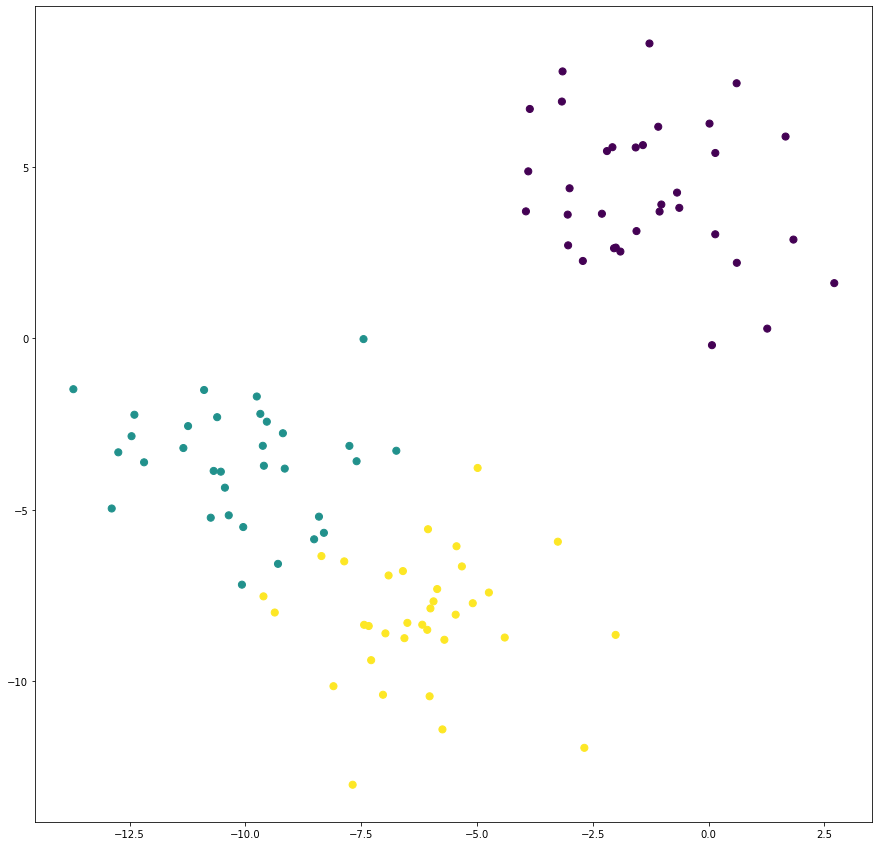

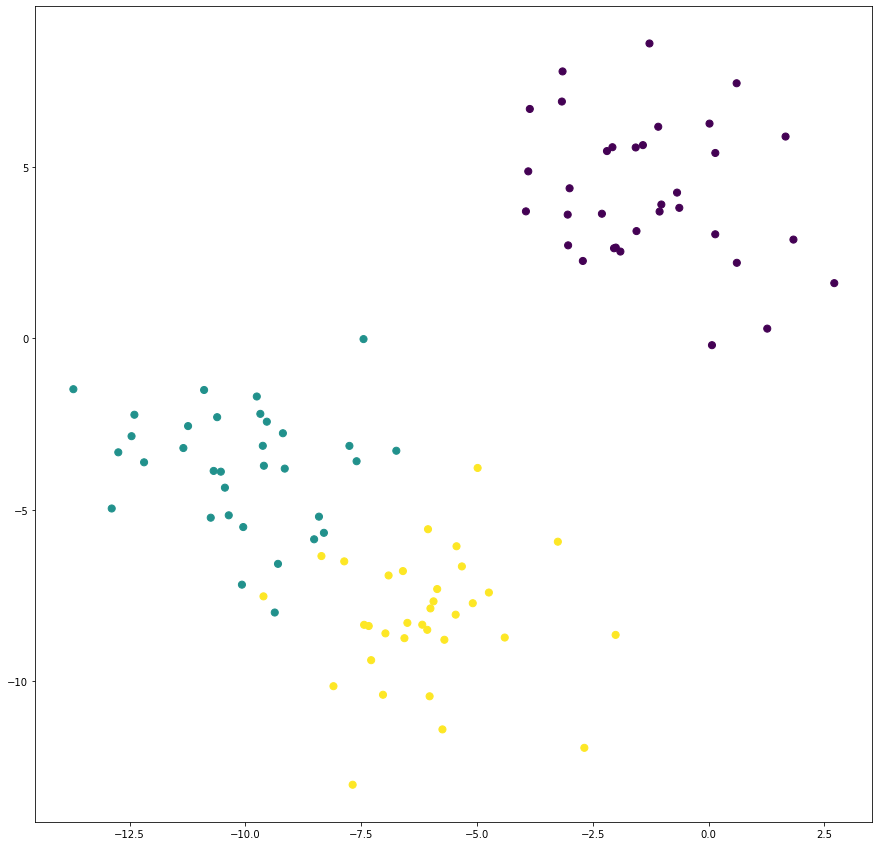

In [20]:
plt.figure(figsize=(15,15))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_3, s=50, cmap='viridis')
plt.figure(figsize=(15,15))
plt.scatter(X[:, 0], X[:, 1], c=Y_values, s=50, cmap='viridis')
print(metrics.confusion_matrix(Y_values, y_kmeans_3))
print(metrics.classification_report(Y_values, y_kmeans_3))

***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

- What do you observe or conclude from these experiments?
    - *What I was able to conclude from this experiment was that I thought it was very interesting to look at a single data set and be able to run several analysis on it. It was very interseting to run it on K=2, K=3 and K=4. There final SSE improved by increasing the K value each time.*
- Which is your “preferred” clustering (K value in particular), and why? (and stattistics)
    - *Since we already know the true Y-values for the cluster, I believe that it is simple to say that K=3 is our best algorithm. The WSS value ends up being 616.50377851 for all runs and our WSS value is 3995.069121328418. Therefore, our statistics once calculated end up being extremely close to the values we seek to achieve. Yet, if we didn't know the true value of the clusters, I would have choosen K=4. The reason being that the WSS value is lower than the other ones, and visually, I would be able to see that there could possible being 4 clusters from the graph above. I would have to also say that my prefer cluster is K = 3 just because we get a 99% accuracy rate. Which could also mean that we are overfitting. Yet, in this instances it we are observing which one does best.*

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [21]:
large1_data_set = pd.read_csv('large1_Xydf.csv')
Y_values = large1_data_set.iloc[:, 3:].to_numpy()
part2_Y_values = Y_values
X_0 = (large1_data_set.iloc[:, 1:2]).to_numpy()
X_1 = (large1_data_set.iloc[:, 2:-1]).to_numpy()

X_0_0 = np.sum(X_0[np.where(Y_values == 0)])/np.count_nonzero(Y_values==0)
X_0_1 = np.sum(X_0[np.where(Y_values == 1)])/np.count_nonzero(Y_values==1)
X_0_2 = np.sum(X_0[np.where(Y_values == 2)])/np.count_nonzero(Y_values==2)
X_0_3 = np.sum(X_0[np.where(Y_values == 3)])/np.count_nonzero(Y_values==3)
X_0_4 = np.sum(X_0[np.where(Y_values == 4)])/np.count_nonzero(Y_values==4)
X_0_5 = np.sum(X_0[np.where(Y_values == 5)])/np.count_nonzero(Y_values==5)
X_0_6 = np.sum(X_0[np.where(Y_values == 6)])/np.count_nonzero(Y_values==6)
X_0_7 = np.sum(X_0[np.where(Y_values == 7)])/np.count_nonzero(Y_values==7)

X_1_0 = np.sum(X_1[np.where(Y_values == 0)])/np.count_nonzero(Y_values==0)
X_1_1 = np.sum(X_1[np.where(Y_values == 1)])/np.count_nonzero(Y_values==1)
X_1_2 = np.sum(X_1[np.where(Y_values == 2)])/np.count_nonzero(Y_values==2)
X_1_3 = np.sum(X_1[np.where(Y_values == 3)])/np.count_nonzero(Y_values==3)
X_1_4 = np.sum(X_1[np.where(Y_values == 4)])/np.count_nonzero(Y_values==4)
X_1_5 = np.sum(X_1[np.where(Y_values == 5)])/np.count_nonzero(Y_values==5)
X_1_6 = np.sum(X_1[np.where(Y_values == 6)])/np.count_nonzero(Y_values==6)
X_1_7 = np.sum(X_1[np.where(Y_values == 7)])/np.count_nonzero(Y_values==7)

In [22]:
#Computing the true WSS
wss_1 = 0;
wss_2 = 0;
wss_3 = 0;
wss_4 = 0;
wss_5 = 0;
wss_6 = 0;
wss_7 = 0;
wss_8 = 0;

for i in range(len(Y_values)):
    if Y_values[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if Y_values[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if Y_values[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)
    if Y_values[i] == 3:
        wss_4 += pow((X_0_3-X_0[i]),2) + pow((X_1_3-X_1[i]),2)
    if Y_values[i] == 4:
        wss_5 += pow((X_0_4-X_0[i]),2) + pow((X_1_4-X_1[i]),2)
    if Y_values[i] == 5:
        wss_6 += pow((X_0_5-X_0[i]),2) + pow((X_1_5-X_1[i]),2)
    if Y_values[i] == 6:
        wss_7 += pow((X_0_6-X_0[i]),2) + pow((X_1_6-X_1[i]),2)
    if Y_values[i] == 7:
        wss_8 += pow((X_0_7-X_0[i]),2) + pow((X_1_7-X_1[i]),2)


WSS_within = wss_1 + wss_2 + wss_3 + wss_4 + wss_5 + wss_6 + wss_7 + wss_8
print("True WSS value for LargeData1: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(Y_values==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(Y_values==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(Y_values==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))
BSS_3 = np.count_nonzero(Y_values==3)*(pow(average_mean_X0 - X_0_3,2) + pow(average_mean_X1 - X_1_3,2))
BSS_4 = np.count_nonzero(Y_values==4)*(pow(average_mean_X0 - X_0_4,2) + pow(average_mean_X1 - X_1_4,2))
BSS_5 = np.count_nonzero(Y_values==5)*(pow(average_mean_X0 - X_0_5,2) + pow(average_mean_X1 - X_1_5,2))
BSS_6 = np.count_nonzero(Y_values==6)*(pow(average_mean_X0 - X_0_6,2) + pow(average_mean_X1 - X_1_6,2))
BSS_7 = np.count_nonzero(Y_values==7)*(pow(average_mean_X0 - X_0_7,2) + pow(average_mean_X1 - X_1_7,2))


BSS = BSS_0+BSS_1+BSS_2 + BSS_3 + BSS_4+BSS_5+BSS_6+BSS_7
print("True BSS value for LargeData1: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("True SSE Value: ", SSE)

True WSS value for LargeData1: [3972.31538793]
True BSS value for LargeData1: 67712.28953700385
True SSE Value:  [71684.60492493]


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

### Run for K = 6

In [23]:
large1_data = pd.read_csv('large1_Xydf.csv')
X = large1_data.iloc[:, 1:-1]
X = X.to_numpy()

In [24]:
%%timeit
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(X)
y_kmeans_6 = kmeans.predict(X)

116 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(X)
y_kmeans_6 = kmeans.predict(X)
X_0_0 = np.sum(X_0[np.where(y_kmeans_6 == 0)])/np.count_nonzero(y_kmeans_6==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_6 == 1)])/np.count_nonzero(y_kmeans_6==1)
X_0_2 = np.sum(X_0[np.where(y_kmeans_6 == 2)])/np.count_nonzero(y_kmeans_6==2)
X_0_3 = np.sum(X_0[np.where(y_kmeans_6 == 3)])/np.count_nonzero(y_kmeans_6==3)
X_0_4 = np.sum(X_0[np.where(y_kmeans_6 == 4)])/np.count_nonzero(y_kmeans_6==4)
X_0_5 = np.sum(X_0[np.where(y_kmeans_6 == 5)])/np.count_nonzero(y_kmeans_6==5)


X_1_0 = np.sum(X_1[np.where(y_kmeans_6 == 0)])/np.count_nonzero(y_kmeans_6==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_6 == 1)])/np.count_nonzero(y_kmeans_6==1)
X_1_2 = np.sum(X_1[np.where(y_kmeans_6 == 2)])/np.count_nonzero(y_kmeans_6==2)
X_1_3 = np.sum(X_1[np.where(y_kmeans_6 == 3)])/np.count_nonzero(y_kmeans_6==3)
X_1_4 = np.sum(X_1[np.where(y_kmeans_6 == 4)])/np.count_nonzero(y_kmeans_6==4)
X_1_5 = np.sum(X_1[np.where(y_kmeans_6 == 5)])/np.count_nonzero(y_kmeans_6==5)

#Computing the true WSS
wss_1 = 0;
wss_2 = 0;
wss_3 = 0;
wss_4 = 0;
wss_5 = 0;
wss_6 = 0;


for i in range(len(y_kmeans_6)):
    if y_kmeans_6[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_6[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if y_kmeans_6[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)
    if y_kmeans_6[i] == 3:
        wss_4 += pow((X_0_3-X_0[i]),2) + pow((X_1_3-X_1[i]),2)
    if y_kmeans_6[i] == 4:
        wss_5 += pow((X_0_4-X_0[i]),2) + pow((X_1_4-X_1[i]),2)
    if y_kmeans_6[i] == 5:
        wss_6 += pow((X_0_5-X_0[i]),2) + pow((X_1_5-X_1[i]),2)


WSS_within_6 = wss_1 + wss_2 + wss_3 + wss_4 + wss_5 + wss_6
print("K=6 WSS value for LargeData1: " + str(WSS_within_6))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(y_kmeans_6==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_6==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(y_kmeans_6==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))
BSS_3 = np.count_nonzero(y_kmeans_6==3)*(pow(average_mean_X0 - X_0_3,2) + pow(average_mean_X1 - X_1_3,2))
BSS_4 = np.count_nonzero(y_kmeans_6==4)*(pow(average_mean_X0 - X_0_4,2) + pow(average_mean_X1 - X_1_4,2))
BSS_5 = np.count_nonzero(y_kmeans_6==5)*(pow(average_mean_X0 - X_0_5,2) + pow(average_mean_X1 - X_1_5,2))



BSS_6 = BSS_0+BSS_1+BSS_2 + BSS_3 + BSS_4+BSS_5
print("BSS value for LargeData1: " + str(BSS_6))
#Now we calculate the SSE values
SSE = BSS_6 + WSS_within_6
print("SSE Value: ", SSE)

K=6 WSS value for LargeData1: [5606.63101958]
BSS value for LargeData1: 66077.9739053488
SSE Value:  [71684.60492493]


### Run for K = 8

In [26]:
%%timeit
kmeans = KMeans(n_clusters = 8, random_state = 0).fit(X)
y_kmeans_8 = kmeans.predict(X)

163 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
#################################Calculating Algorithm######################################
kmeans = KMeans(n_clusters = 8, random_state = 0).fit(X)
y_kmeans_8 = kmeans.predict(X)
Y_values = y_kmeans_8
##########################Fixes predicted vector to match true values as best as possible
if y_kmeans_8[0] != 1:
    for i in range(len(y_kmeans_8)):
        if y_kmeans_8[i] == 0:#
            y_kmeans_8[i] = 3
        elif y_kmeans_8[i] == 1:#
            y_kmeans_8[i] = 5
        elif y_kmeans_8[i] == 2:#
            y_kmeans_8[i] = 0
        elif y_kmeans_8[i] == 3:#
            y_kmeans_8[i] = 6
        elif y_kmeans_8[i] == 4:#
            y_kmeans_8[i] = 2
        elif y_kmeans_8[i] == 5:#
            y_kmeans_8[i] = 7
        elif y_kmeans_8[i] == 6:#
            y_kmeans_8[i] = 1
        elif y_kmeans_8[i] == 7:
            y_kmeans_8[i] = 4
print(part2_Y_values.reshape(len(part2_Y_values))[0:20])
print(y_kmeans_8.reshape(len(part2_Y_values))[0:20])
#################################Calculating WSS######################################
X_0_0 = np.sum(X_0[np.where(Y_values == 0)])/np.count_nonzero(Y_values==0)
X_0_1 = np.sum(X_0[np.where(Y_values == 1)])/np.count_nonzero(Y_values==1)
X_0_2 = np.sum(X_0[np.where(Y_values == 2)])/np.count_nonzero(Y_values==2)
X_0_3 = np.sum(X_0[np.where(Y_values == 3)])/np.count_nonzero(Y_values==3)
X_0_4 = np.sum(X_0[np.where(Y_values == 4)])/np.count_nonzero(Y_values==4)
X_0_5 = np.sum(X_0[np.where(Y_values == 5)])/np.count_nonzero(Y_values==5)
X_0_6 = np.sum(X_0[np.where(Y_values == 6)])/np.count_nonzero(Y_values==6)
X_0_7 = np.sum(X_0[np.where(Y_values == 7)])/np.count_nonzero(Y_values==7)

X_1_0 = np.sum(X_1[np.where(Y_values == 0)])/np.count_nonzero(Y_values==0)
X_1_1 = np.sum(X_1[np.where(Y_values == 1)])/np.count_nonzero(Y_values==1)
X_1_2 = np.sum(X_1[np.where(Y_values == 2)])/np.count_nonzero(Y_values==2)
X_1_3 = np.sum(X_1[np.where(Y_values == 3)])/np.count_nonzero(Y_values==3)
X_1_4 = np.sum(X_1[np.where(Y_values == 4)])/np.count_nonzero(Y_values==4)
X_1_5 = np.sum(X_1[np.where(Y_values == 5)])/np.count_nonzero(Y_values==5)
X_1_6 = np.sum(X_1[np.where(Y_values == 6)])/np.count_nonzero(Y_values==6)
X_1_7 = np.sum(X_1[np.where(Y_values == 7)])/np.count_nonzero(Y_values==7)
#Computing the true WSS
wss_1 = 0;
wss_2 = 0;
wss_3 = 0;
wss_4 = 0;
wss_5 = 0;
wss_6 = 0;
wss_7 = 0;
wss_8 = 0;

for i in range(len(Y_values)):
    if Y_values[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if Y_values[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if Y_values[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)
    if Y_values[i] == 3:
        wss_4 += pow((X_0_3-X_0[i]),2) + pow((X_1_3-X_1[i]),2)
    if Y_values[i] == 4:
        wss_5 += pow((X_0_4-X_0[i]),2) + pow((X_1_4-X_1[i]),2)
    if Y_values[i] == 5:
        wss_6 += pow((X_0_5-X_0[i]),2) + pow((X_1_5-X_1[i]),2)
    if Y_values[i] == 6:
        wss_7 += pow((X_0_6-X_0[i]),2) + pow((X_1_6-X_1[i]),2)
    if Y_values[i] == 7:
        wss_8 += pow((X_0_7-X_0[i]),2) + pow((X_1_7-X_1[i]),2)


WSS_within_8 = wss_1 + wss_2 + wss_3 + wss_4 + wss_5 + wss_6 + wss_7 + wss_8
print("K=8 WSS value for LargeData1: " + str(WSS_within_8))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(Y_values==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(Y_values==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(Y_values==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))
BSS_3 = np.count_nonzero(Y_values==3)*(pow(average_mean_X0 - X_0_3,2) + pow(average_mean_X1 - X_1_3,2))
BSS_4 = np.count_nonzero(Y_values==4)*(pow(average_mean_X0 - X_0_4,2) + pow(average_mean_X1 - X_1_4,2))
BSS_5 = np.count_nonzero(Y_values==5)*(pow(average_mean_X0 - X_0_5,2) + pow(average_mean_X1 - X_1_5,2))
BSS_6 = np.count_nonzero(Y_values==6)*(pow(average_mean_X0 - X_0_6,2) + pow(average_mean_X1 - X_1_6,2))
BSS_7 = np.count_nonzero(Y_values==7)*(pow(average_mean_X0 - X_0_7,2) + pow(average_mean_X1 - X_1_7,2))


BSS_8 = BSS_0+BSS_1+BSS_2 + BSS_3 + BSS_4+BSS_5+BSS_6+BSS_7
print("K=8 BSS value for LargeData1: " + str(BSS_8))
#Now we calculate the SSE values
SSE = BSS_8 + WSS_within_8
print("SSE value for LargeData1: ", SSE)

[1 3 3 3 6 0 3 3 6 5 4 6 1 1 4 7 0 1 2 1]
[1 3 3 3 6 0 3 3 6 5 4 6 1 1 5 7 5 1 2 1]
K=8 WSS value for LargeData1: [3549.25918331]
K=8 BSS value for LargeData1: 68135.34574162426
SSE value for LargeData1:  [71684.60492493]


### Run for K = 10

In [28]:
%%timeit
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X)
y_kmeans_10 = kmeans.predict(X)

238 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X)
y_kmeans_10 = kmeans.predict(X)
X_0_0 = np.sum(X_0[np.where(y_kmeans_10 == 0)])/np.count_nonzero(y_kmeans_10==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_10 == 1)])/np.count_nonzero(y_kmeans_10==1)
X_0_2 = np.sum(X_0[np.where(y_kmeans_10 == 2)])/np.count_nonzero(y_kmeans_10==2)
X_0_3 = np.sum(X_0[np.where(y_kmeans_10 == 3)])/np.count_nonzero(y_kmeans_10==3)
X_0_4 = np.sum(X_0[np.where(y_kmeans_10 == 4)])/np.count_nonzero(y_kmeans_10==4)
X_0_5 = np.sum(X_0[np.where(y_kmeans_10 == 5)])/np.count_nonzero(y_kmeans_10==5)
X_0_6 = np.sum(X_0[np.where(y_kmeans_10 == 6)])/np.count_nonzero(y_kmeans_10==6)
X_0_7 = np.sum(X_0[np.where(y_kmeans_10 == 7)])/np.count_nonzero(y_kmeans_10==7)
X_0_8 = np.sum(X_0[np.where(y_kmeans_10 == 8)])/np.count_nonzero(y_kmeans_10==8)
X_0_9 = np.sum(X_0[np.where(y_kmeans_10 == 9)])/np.count_nonzero(y_kmeans_10==9)

X_1_0 = np.sum(X_1[np.where(y_kmeans_10 == 0)])/np.count_nonzero(y_kmeans_10==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_10 == 1)])/np.count_nonzero(y_kmeans_10==1)
X_1_2 = np.sum(X_1[np.where(y_kmeans_10 == 2)])/np.count_nonzero(y_kmeans_10==2)
X_1_3 = np.sum(X_1[np.where(y_kmeans_10 == 3)])/np.count_nonzero(y_kmeans_10==3)
X_1_4 = np.sum(X_1[np.where(y_kmeans_10 == 4)])/np.count_nonzero(y_kmeans_10==4)
X_1_5 = np.sum(X_1[np.where(y_kmeans_10 == 5)])/np.count_nonzero(y_kmeans_10==5)
X_1_6 = np.sum(X_1[np.where(y_kmeans_10 == 6)])/np.count_nonzero(y_kmeans_10==6)
X_1_7 = np.sum(X_1[np.where(y_kmeans_10 == 7)])/np.count_nonzero(y_kmeans_10==7)
X_1_8 = np.sum(X_1[np.where(y_kmeans_10 == 8)])/np.count_nonzero(y_kmeans_10==8)
X_1_9 = np.sum(X_1[np.where(y_kmeans_10 == 9)])/np.count_nonzero(y_kmeans_10==9)
#Computing the true WSS
wss_1 = 0;
wss_2 = 0;
wss_3 = 0;
wss_4 = 0;
wss_5 = 0;
wss_6 = 0;
wss_7 = 0;
wss_8 = 0;
wss_9 = 0;
wss_10 = 0;
for i in range(len(y_kmeans_10)):
    if y_kmeans_10[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_10[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if y_kmeans_10[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)
    if y_kmeans_10[i] == 3:
        wss_4 += pow((X_0_3-X_0[i]),2) + pow((X_1_3-X_1[i]),2)
    if y_kmeans_10[i] == 4:
        wss_5 += pow((X_0_4-X_0[i]),2) + pow((X_1_4-X_1[i]),2)
    if y_kmeans_10[i] == 5:
        wss_6 += pow((X_0_5-X_0[i]),2) + pow((X_1_5-X_1[i]),2)
    if y_kmeans_10[i] == 6:
        wss_7 += pow((X_0_6-X_0[i]),2) + pow((X_1_6-X_1[i]),2)
    if y_kmeans_10[i] == 7:
        wss_8 += pow((X_0_7-X_0[i]),2) + pow((X_1_7-X_1[i]),2)
    if y_kmeans_10[i] == 8:
        wss_9 += pow((X_0_8-X_0[i]),2) + pow((X_1_8-X_1[i]),2)
    if y_kmeans_10[i] == 9:
        wss_10 += pow((X_0_9-X_0[i]),2) + pow((X_1_9-X_1[i]),2)


WSS_within = wss_1 + wss_2 + wss_3 + wss_4 + wss_5 + wss_6 + wss_7 + wss_8 + wss_9 + wss_10
print("K=10 WSS value for LargeData1: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(y_kmeans_10==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_10==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(y_kmeans_10==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))
BSS_3 = np.count_nonzero(y_kmeans_10==3)*(pow(average_mean_X0 - X_0_3,2) + pow(average_mean_X1 - X_1_3,2))
BSS_4 = np.count_nonzero(y_kmeans_10==4)*(pow(average_mean_X0 - X_0_4,2) + pow(average_mean_X1 - X_1_4,2))
BSS_5 = np.count_nonzero(y_kmeans_10==5)*(pow(average_mean_X0 - X_0_5,2) + pow(average_mean_X1 - X_1_5,2))
BSS_6 = np.count_nonzero(y_kmeans_10==6)*(pow(average_mean_X0 - X_0_6,2) + pow(average_mean_X1 - X_1_6,2))
BSS_7 = np.count_nonzero(y_kmeans_10==7)*(pow(average_mean_X0 - X_0_7,2) + pow(average_mean_X1 - X_1_7,2))
BSS_8 = np.count_nonzero(y_kmeans_10==8)*(pow(average_mean_X0 - X_0_8,2) + pow(average_mean_X1 - X_1_8,2))
BSS_9 = np.count_nonzero(y_kmeans_10==9)*(pow(average_mean_X0 - X_0_9,2) + pow(average_mean_X1 - X_1_9,2))


BSS = BSS_0+BSS_1+BSS_2 + BSS_3 + BSS_4+BSS_5+BSS_6+BSS_7+BSS_8+BSS_9
print("K=10 BSS value for LargeData1: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE value for LargeData1: ", SSE)

K=10 WSS value for LargeData1: [3184.36345496]
K=10 BSS value for LargeData1: 68500.2414699702
SSE value for LargeData1:  [71684.60492493]


***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

[[167   0   0   0   1  81   1   0]
 [  0 247   0   2   0   0   0   1]
 [  0   1 246   3   0   0   0   0]
 [  0  12   0 237   1   0   0   0]
 [  1   0   0   0 229  20   0   0]
 [ 90   0   0   0   6 154   0   0]
 [  1   0   0   0   0   0 249   0]
 [  0   0   0   0   0   0   1 249]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       250
           1       0.95      0.99      0.97       250
           2       1.00      0.98      0.99       250
           3       0.98      0.95      0.96       250
           4       0.97      0.92      0.94       250
           5       0.60      0.62      0.61       250
           6       0.99      1.00      0.99       250
           7       1.00      1.00      1.00       250

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



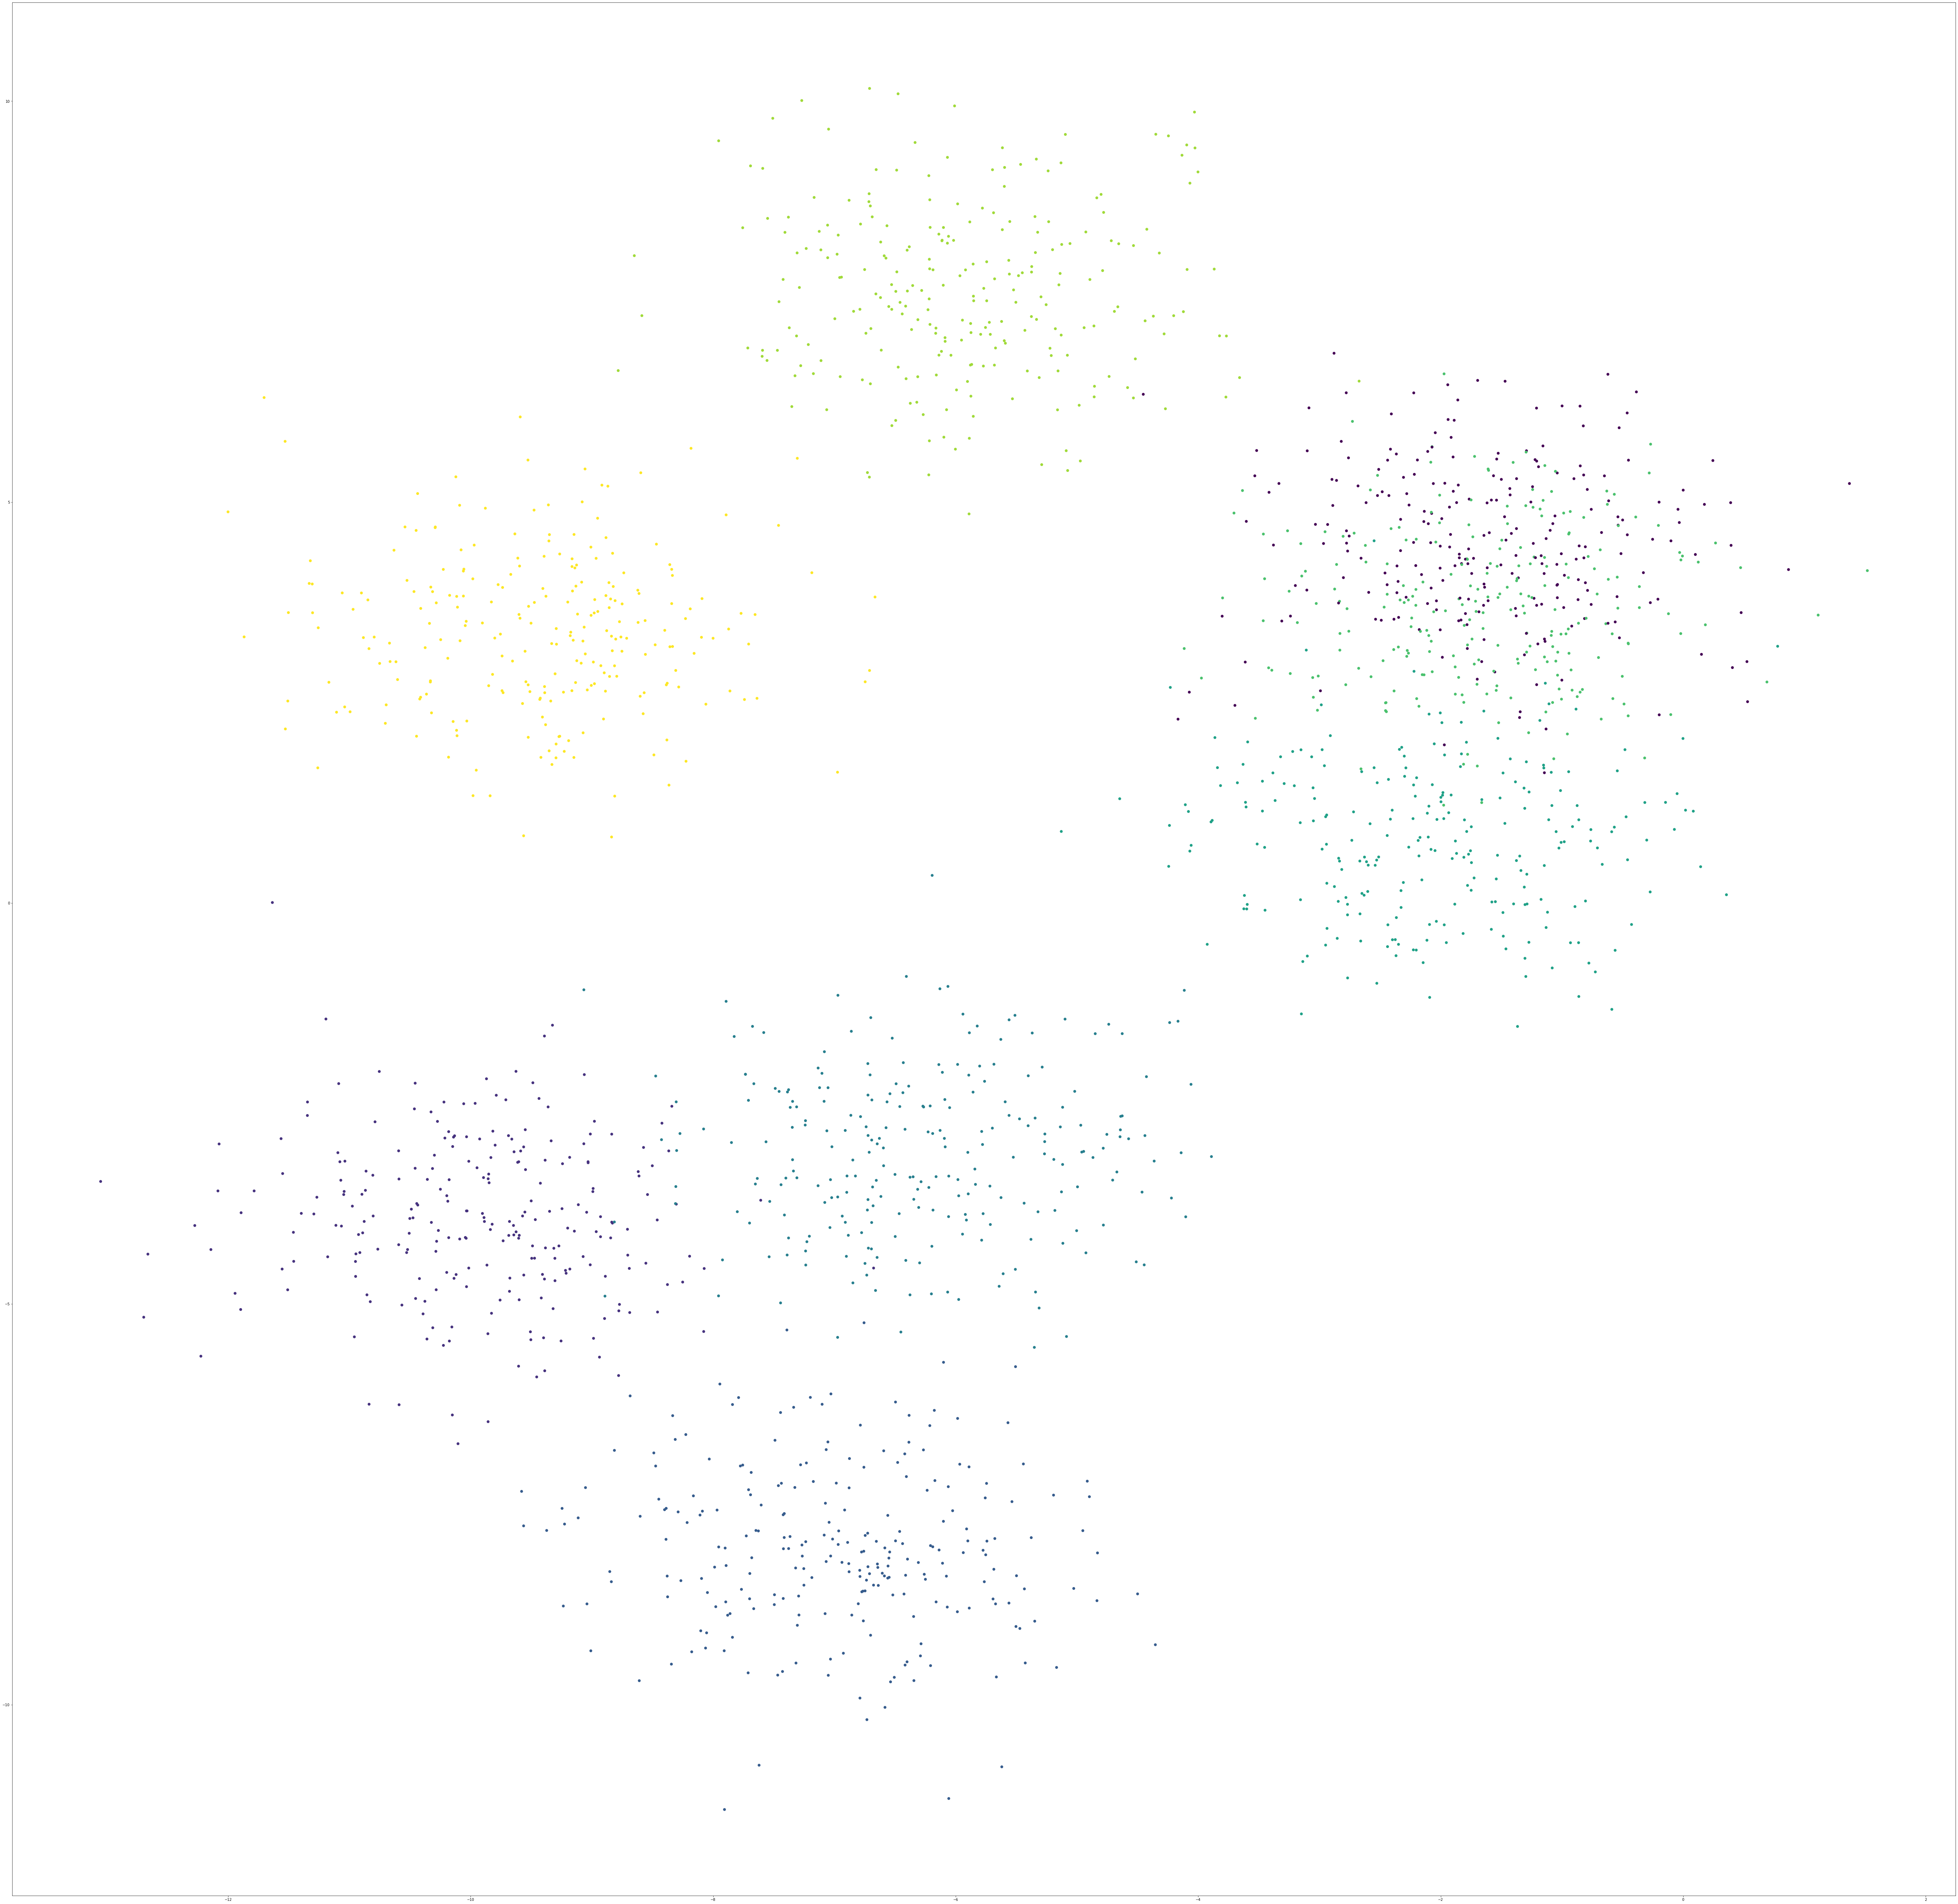

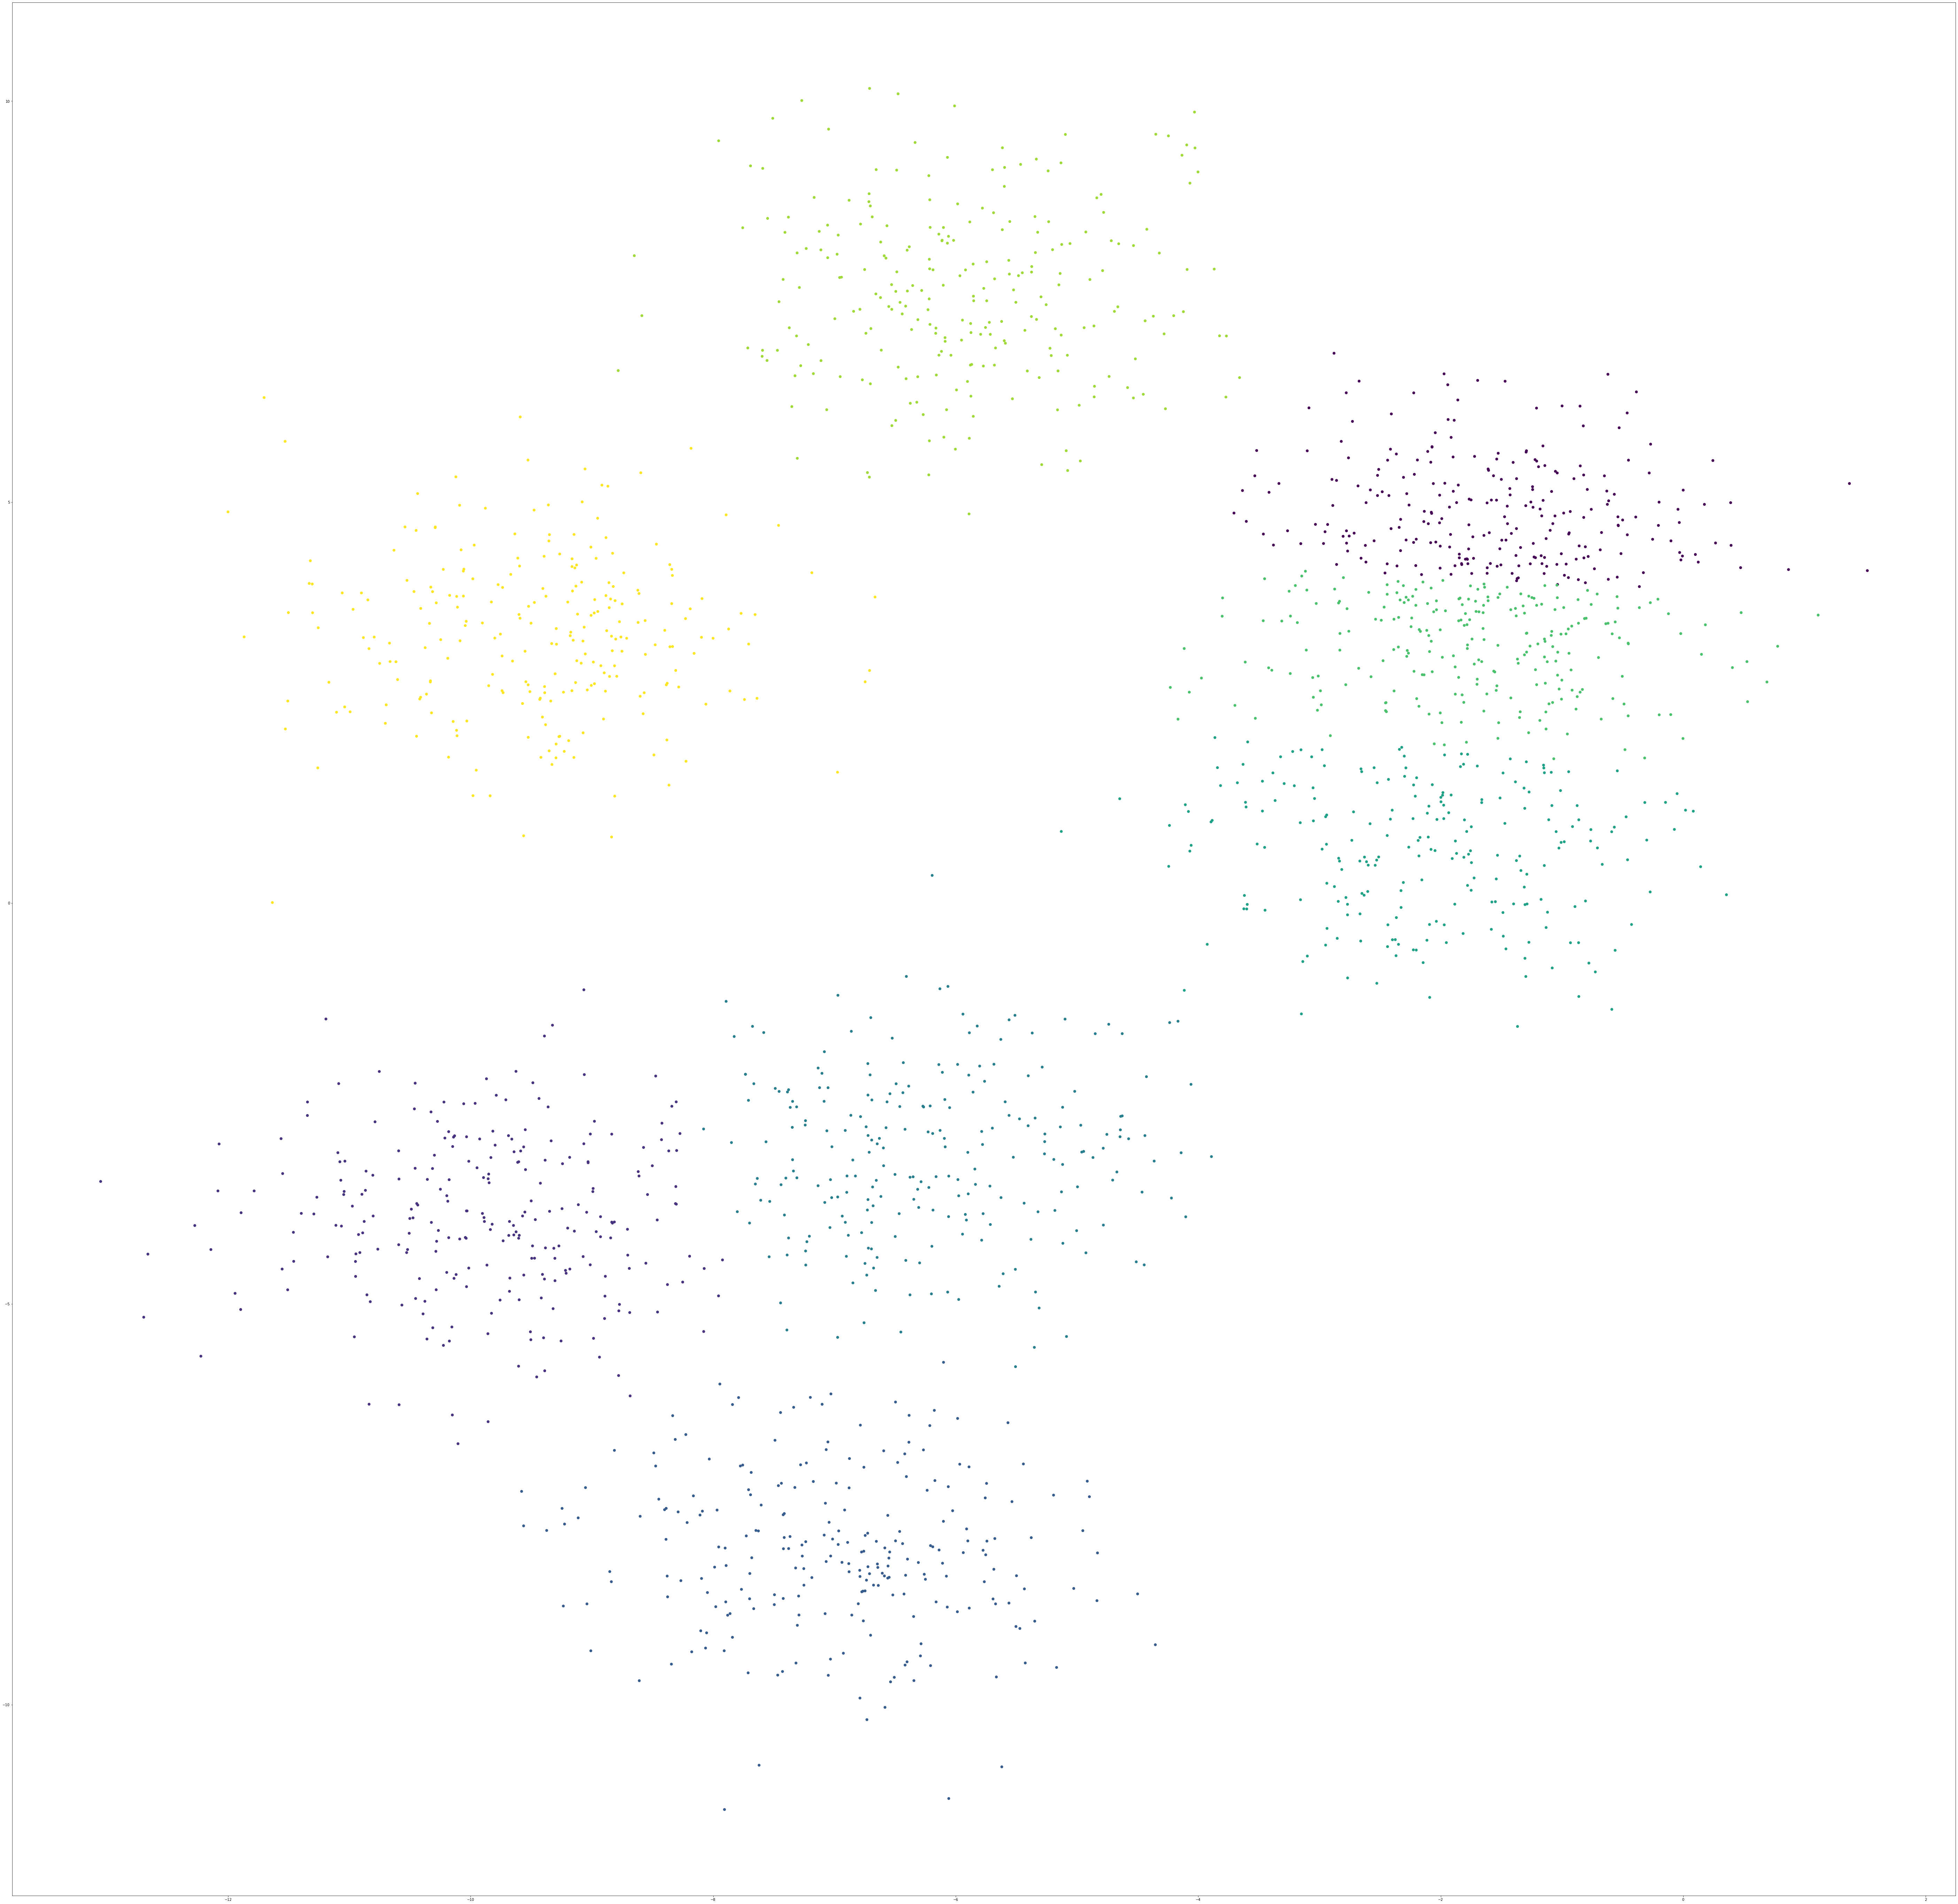

In [30]:
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=part2_Y_values, s=50, cmap='viridis')
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_8, s=50, cmap='viridis')

print(metrics.confusion_matrix(part2_Y_values, y_kmeans_8))
print(metrics.classification_report(part2_Y_values, y_kmeans_8))

***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

What do you observe or conclude from these experiments?
- *First, what I concluded from our experiments was that there was so much more work that had to be done in when working with more clusters. It took me a lot longer and it was all due to human error. For example not initializing something correctly when looking at what index it should have corresponded too. Secondly, it might be a trend as the WSS value decreases as the number of clusters increase and the BSS value increases. Also, attempting to find a match for the overall cluster was such a pain. I had to look through the whole array of values to find the values that would line up. My observations from the experiment though was that the algorithm for K=8 actually did quite a nice job.*

Which is your “preferred” clustering (K value in particular), and why?
- *My preferred cluster would have to be K=8. This being the case that we already know what values we need for K to get the most accurate representation. My accuracy ended up being 85% and it was able to do a very good job when cluster everything except values that belonged to clusters 0 and 5. Which means that we could possible edit the data in order to see get a better result. Yet, the higher the result the more prone we are to overfitting. However, if I were to pick one without knowing the actual number of cluster I would have chosen K=6 simply because it has the highest BSS value and lowest WSS value which is what we want. 


***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [31]:
large2_data_set = pd.read_csv('large2_Xydf.csv')
Y_values_2 = large2_data_set.iloc[:, 3:].to_numpy()
part3_Y_values_2 = Y_values_2
X_0 = (large2_data_set.iloc[:, 1:2]).to_numpy()
X_1 = (large2_data_set.iloc[:, 2:-1]).to_numpy()

X_0_0 = np.sum(X_0[np.where(Y_values_2 == 0)])/np.count_nonzero(Y_values_2==0)
X_0_1 = np.sum(X_0[np.where(Y_values_2 == 1)])/np.count_nonzero(Y_values_2==1)

X_1_0 = np.sum(X_1[np.where(Y_values_2 == 0)])/np.count_nonzero(Y_values_2==0)
X_1_1 = np.sum(X_1[np.where(Y_values_2 == 1)])/np.count_nonzero(Y_values_2==1)

#Computing the true WSS
wss_1 = 0;
wss_2 = 0;

for i in range(len(Y_values_2)):
    if Y_values_2[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if Y_values_2[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)

WSS_within = wss_1 + wss_2
print("True WSS value for LargeData2: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(Y_values_2==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(Y_values_2==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))

BSS = BSS_0+BSS_1
print("True BSS value for LargeData1: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("True SSE Value: ", SSE)

True WSS value for LargeData2: [1277.61616247]
True BSS value for LargeData1: 801.5364401177077
True SSE Value:  [2079.15260259]


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

In [32]:
large2_data = pd.read_csv('large2_Xydf.csv')
Y_values_2 = large2_data.iloc[:, 3:].to_numpy()
part3_Y_values_2 = Y_values_2
X_0 = (large2_data.iloc[:, 1:2]).to_numpy()
X_1 = (large2_data.iloc[:, 2:-1]).to_numpy()
X = large2_data.iloc[:, 1:-1]
X = X.to_numpy()

### K=2

In [33]:
%%timeit
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
y_kmeans_2_3 = kmeans.predict(X)

68.5 ms ± 5.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
y_kmeans_2_3 = kmeans.predict(X)
print(y_kmeans_2_3)
X_0_0 = np.sum(X_0[np.where(y_kmeans_2_3 == 0)])/np.count_nonzero(y_kmeans_2_3==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_2_3 == 1)])/np.count_nonzero(y_kmeans_2_3==1)

X_1_0 = np.sum(X_1[np.where(y_kmeans_2_3 == 0)])/np.count_nonzero(y_kmeans_2_3==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_2_3 == 1)])/np.count_nonzero(y_kmeans_2_3==1)

#Computing the true WSS
wss_1 = 0;
wss_2 = 0;

for i in range(len(y_kmeans_2_3)):
    if y_kmeans_2_3[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_2_3[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)

WSS_within = wss_1 + wss_2 
print("K=2 WSS value for LargeData2: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(y_kmeans_2_3==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_2_3==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))

BSS = BSS_0+BSS_1
print("BSS value for LargeData1: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value: ", SSE)

[0 1 0 ... 1 1 0]
K=2 WSS value for LargeData2: [865.00228653]
BSS value for LargeData1: 1214.150316052171
SSE Value:  [2079.15260259]


### K=3

In [35]:
%%timeit
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
y_kmeans_3_3 = kmeans.predict(X)

122 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
###############################Running algorithm###########################################
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
y_kmeans_3_3 = kmeans.predict(X)
print(y_kmeans_3_3)
###############################Calculating WSS###########################################

X_0_0 = np.sum(X_0[np.where(y_kmeans_3_3 == 0)])/np.count_nonzero(y_kmeans_3_3==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_3_3 == 1)])/np.count_nonzero(y_kmeans_3_3==1)
X_0_2 = np.sum(X_0[np.where(y_kmeans_3_3 == 2)])/np.count_nonzero(y_kmeans_3_3==2)

X_1_0 = np.sum(X_1[np.where(y_kmeans_3_3 == 0)])/np.count_nonzero(y_kmeans_3_3==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_3_3 == 1)])/np.count_nonzero(y_kmeans_3_3==1)
X_1_2 = np.sum(X_1[np.where(y_kmeans_3_3 == 2)])/np.count_nonzero(y_kmeans_3_3==2)

#Computing the true WSS
wss_1 = 0
wss_2 = 0
wss_3 = 0
for i in range(len(y_kmeans_3_3)):
    if y_kmeans_3_3[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_3_3[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if y_kmeans_3_3[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)

WSS_within = wss_1 + wss_2 + wss_3
print("K=3 WSS value for LargeData2: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(y_kmeans_3_3==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_3_3==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(y_kmeans_3_3==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))

BSS = BSS_0+BSS_1+BSS_2
print("K=3 BSS value for LargeData1: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("K=3 SSE Value: ", SSE)

[0 1 2 ... 1 2 2]
K=3 WSS value for LargeData2: [590.29931409]
K=3 BSS value for LargeData1: 1488.853288492564
K=3 SSE Value:  [2079.15260259]


### K=4

In [37]:
%%timeit
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
y_kmeans_3_3 = kmeans.predict(X)

125 ms ± 9.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
###############################Running algorithm###########################################
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
y_kmeans_4_3 = kmeans.predict(X)
print(y_kmeans_4_3)
###############################Calculating WSS###########################################

X_0_0 = np.sum(X_0[np.where(y_kmeans_4_3 == 0)])/np.count_nonzero(y_kmeans_4_3==0)
X_0_1 = np.sum(X_0[np.where(y_kmeans_4_3 == 1)])/np.count_nonzero(y_kmeans_4_3==1)
X_0_2 = np.sum(X_0[np.where(y_kmeans_4_3 == 2)])/np.count_nonzero(y_kmeans_4_3==2)
X_0_3 = np.sum(X_0[np.where(y_kmeans_4_3 == 3)])/np.count_nonzero(y_kmeans_4_3==3)

X_1_0 = np.sum(X_1[np.where(y_kmeans_4_3 == 0)])/np.count_nonzero(y_kmeans_4_3==0)
X_1_1 = np.sum(X_1[np.where(y_kmeans_4_3 == 1)])/np.count_nonzero(y_kmeans_4_3==1)
X_1_2 = np.sum(X_1[np.where(y_kmeans_4_3 == 2)])/np.count_nonzero(y_kmeans_4_3==2)
X_1_3 = np.sum(X_1[np.where(y_kmeans_4_3 == 3)])/np.count_nonzero(y_kmeans_4_3==3)

#Computing the true WSS
wss_1 = 0
wss_2 = 0
wss_3 = 0
wss_4 = 0
for i in range(len(y_kmeans_4_3)):
    if y_kmeans_4_3[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if y_kmeans_4_3[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if y_kmeans_4_3[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)
    if y_kmeans_4_3[i] == 3:
        wss_4 += pow((X_0_3-X_0[i]),2) + pow((X_1_3-X_1[i]),2)

WSS_within = wss_1 + wss_2 + wss_3 + wss_4
print("K=4 WSS value for LargeData2: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(y_kmeans_4_3==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(y_kmeans_4_3==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(y_kmeans_4_3==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))
BSS_3 = np.count_nonzero(y_kmeans_4_3==3)*(pow(average_mean_X0 - X_0_3,2) + pow(average_mean_X1 - X_1_3,2))

BSS = BSS_0+BSS_1+BSS_2 + BSS_3
print("K=4 BSS value for LargeData1: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("K=4 SSE Value: ", SSE)

[2 1 3 ... 1 0 0]
K=4 WSS value for LargeData2: [392.70088003]
K=4 BSS value for LargeData1: 1686.451722557056
K=4 SSE Value:  [2079.15260259]


***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

[[758 242]
 [234 766]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.76      0.77      0.76      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



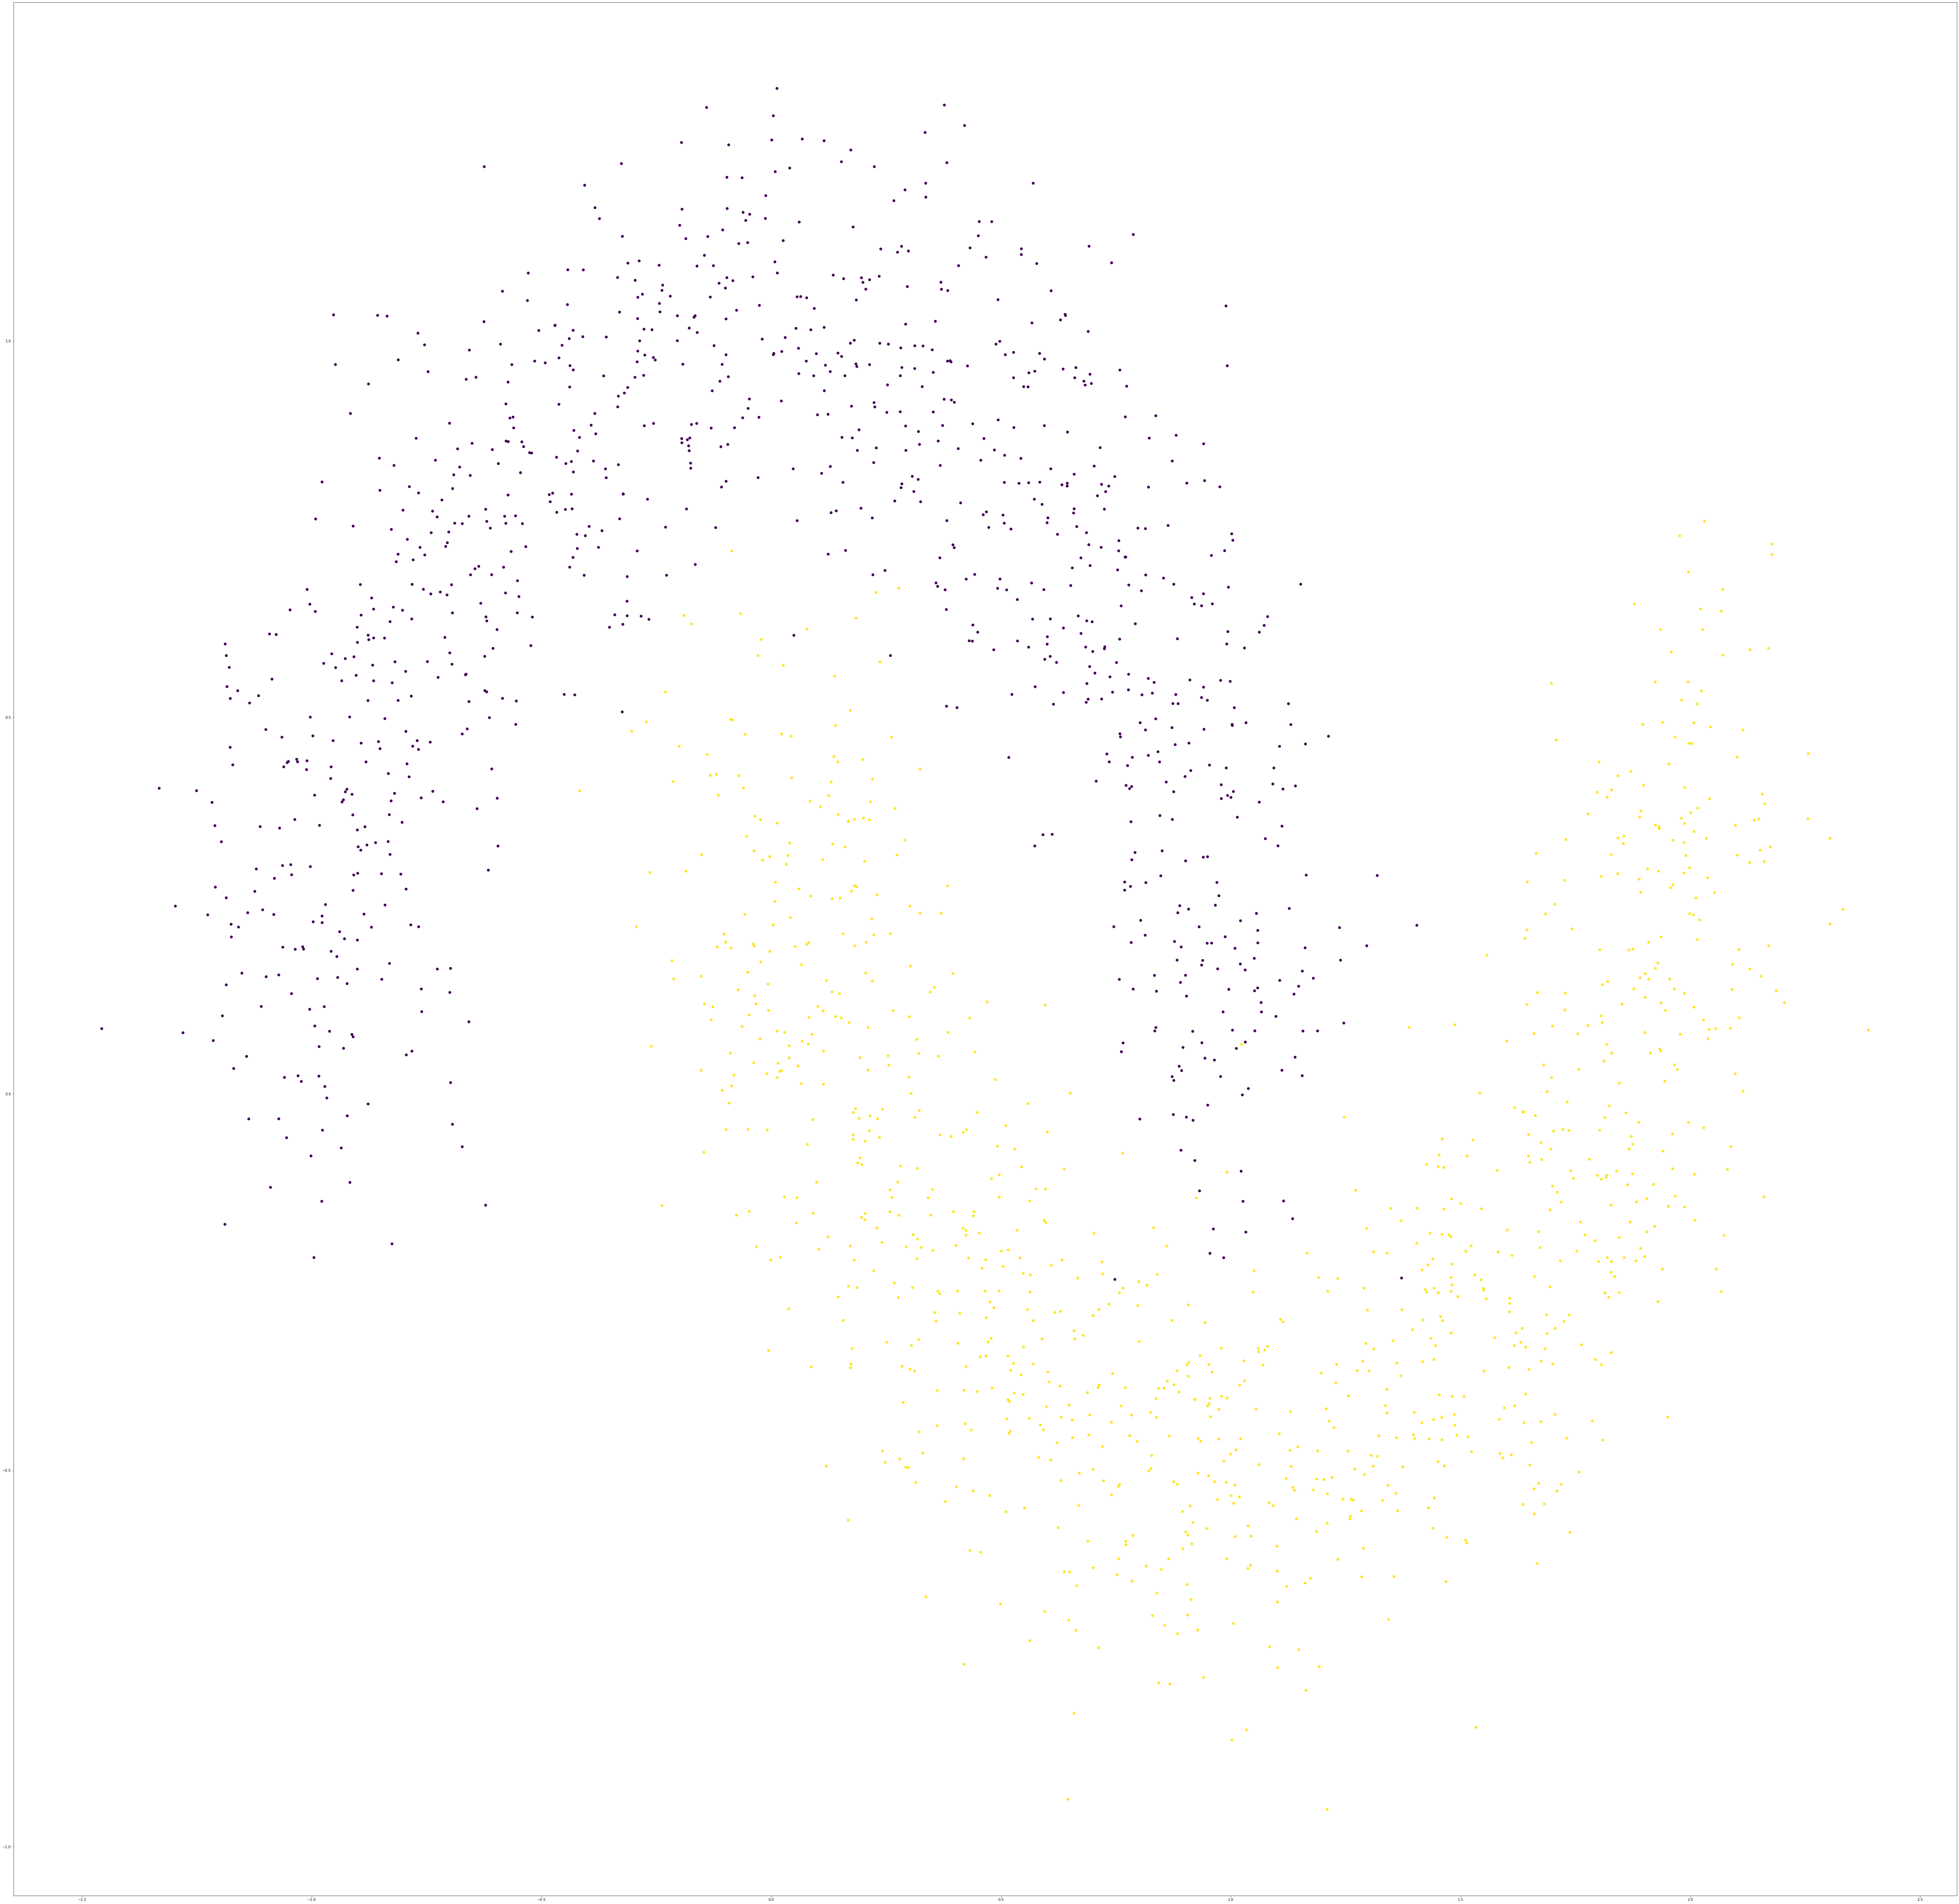

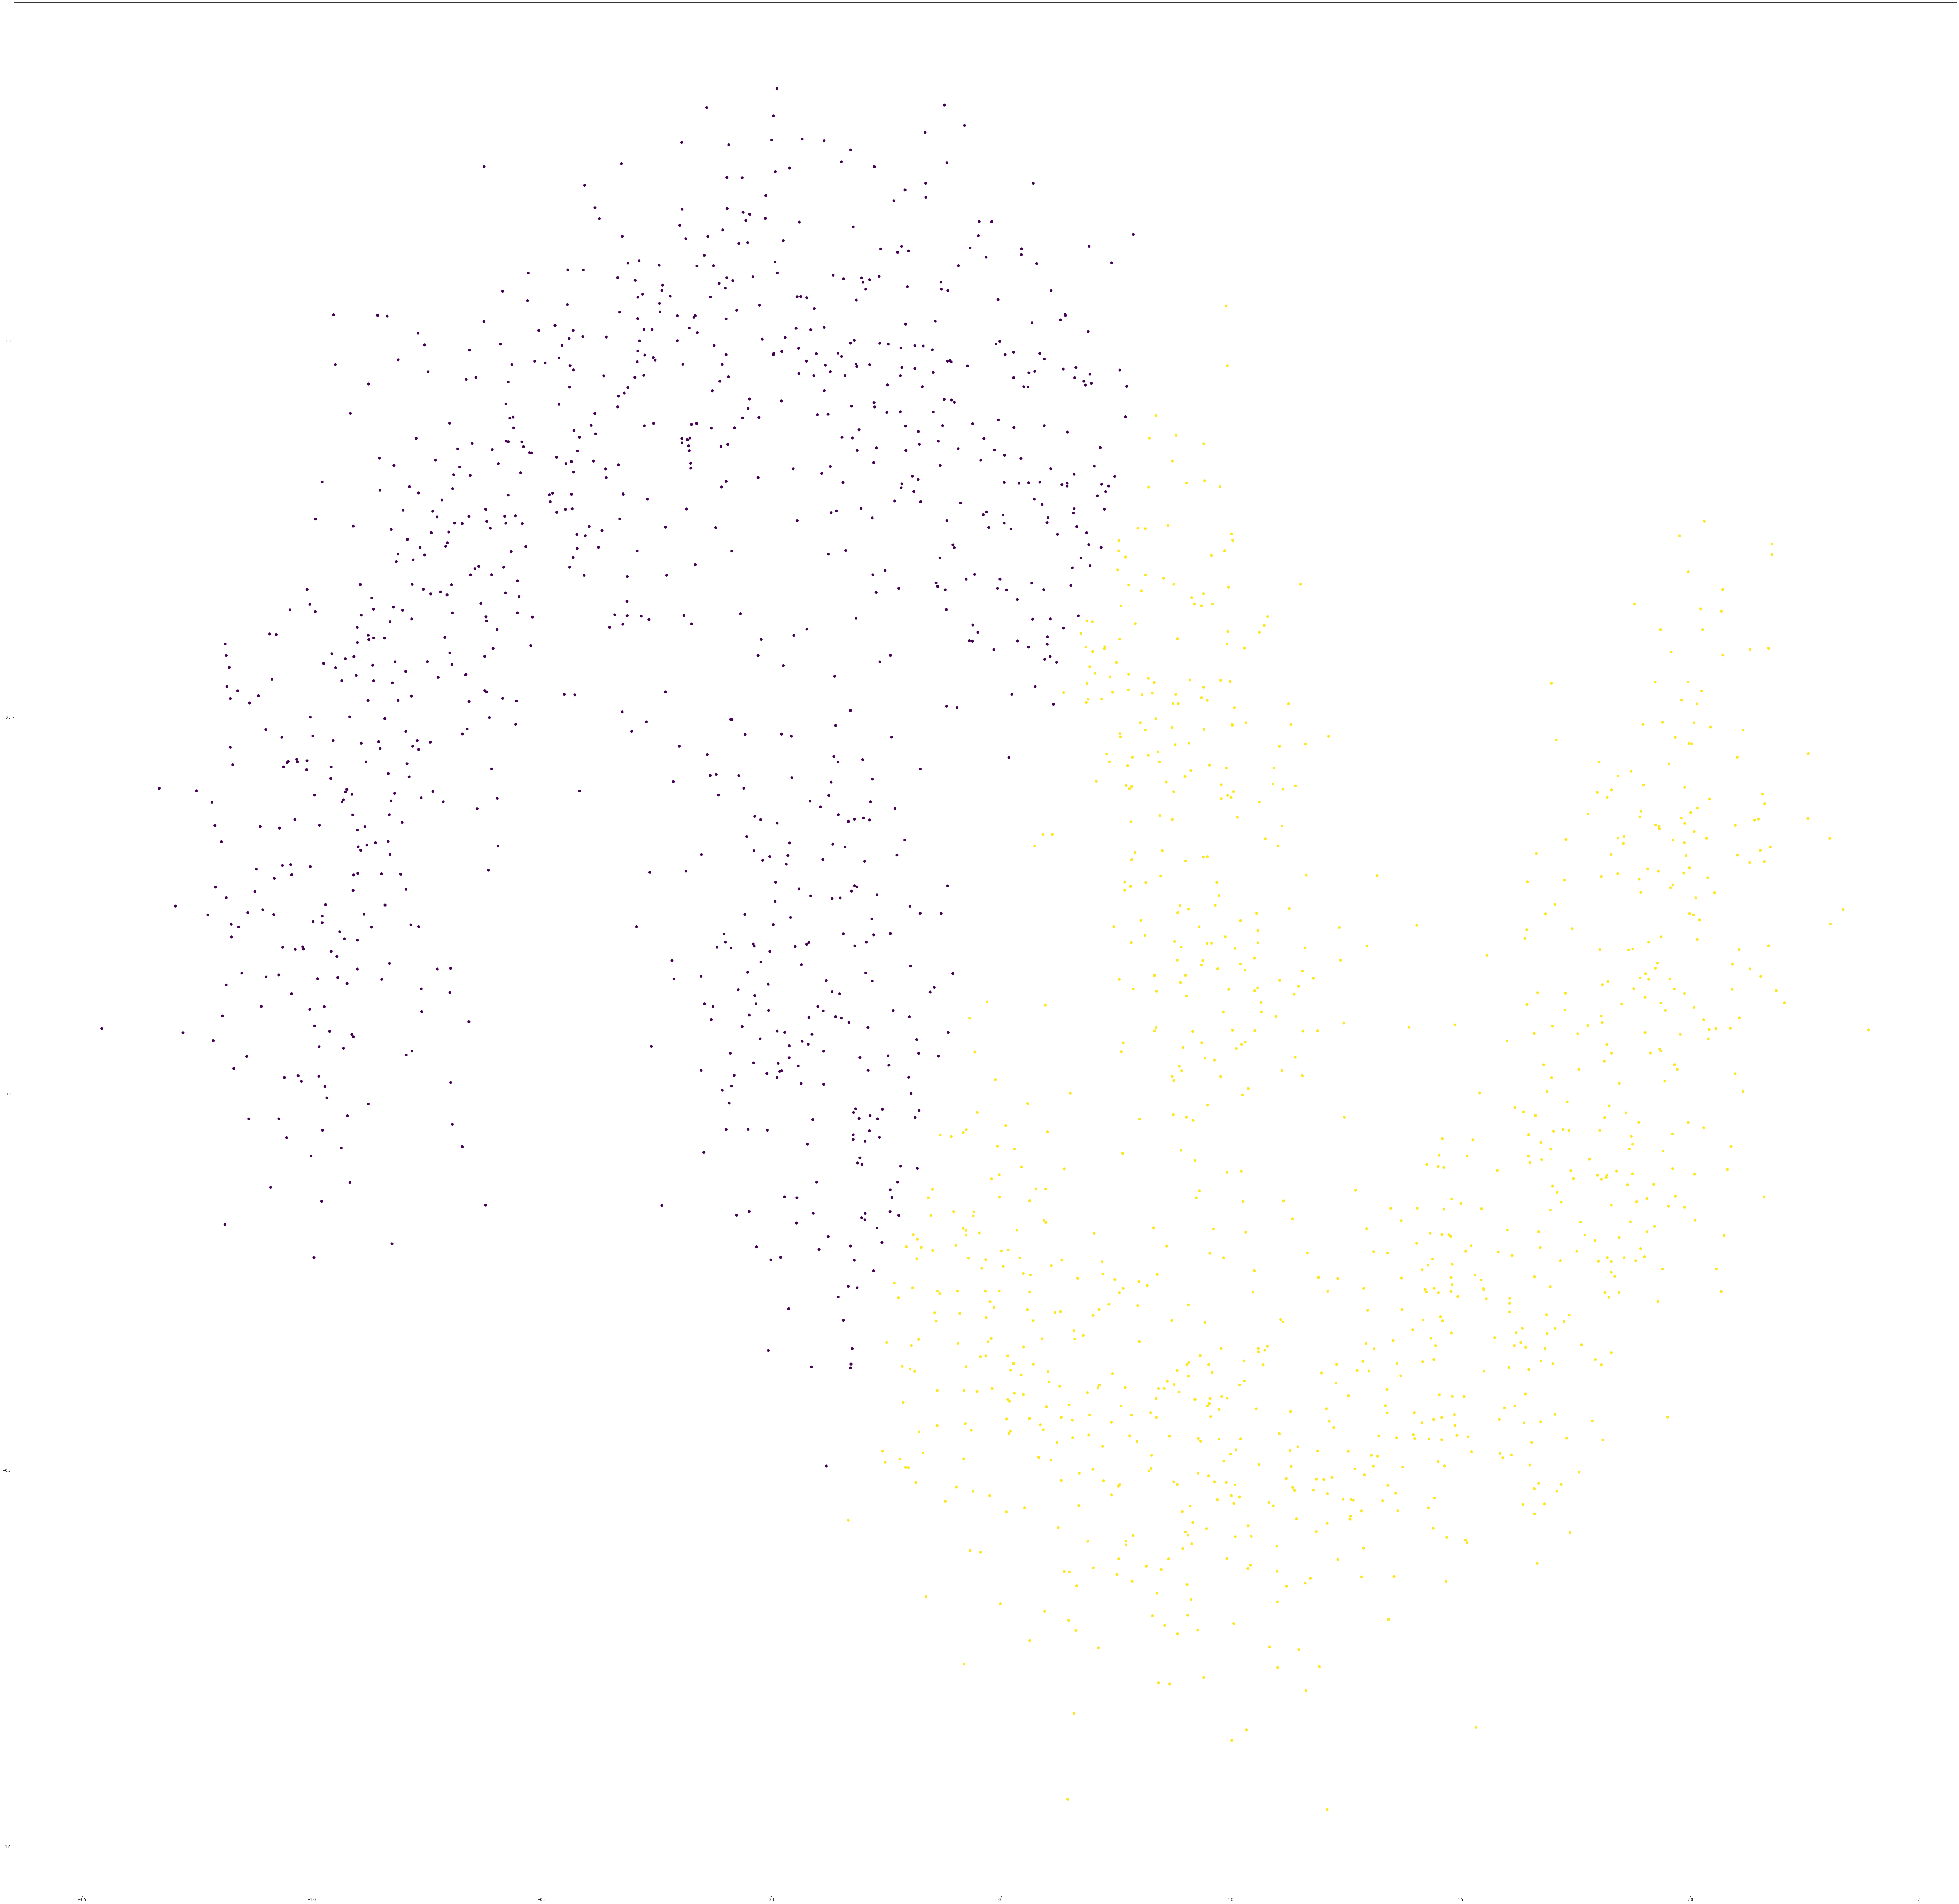

In [39]:
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=part3_Y_values_2, s=50, cmap='viridis')
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_2_3, s=50, cmap='viridis')

print(metrics.confusion_matrix(part3_Y_values_2, y_kmeans_2_3))
print(metrics.classification_report(part3_Y_values_2, y_kmeans_2_3))

***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

What do you observe or conclude from these experiments?
- *What had be the most surprise thing from this experiments was that we had such a large dataset just to classify 2 classes. I thought it was very intersting, but which also lead to add more cluster giving better results. From looking at the graph, I would have thought that we would have needed at least 4 clusters to get better results. Maybe even more. Yet, I could see the potential in increasing cluster size.*

Which is your “preferred” clustering (K value in particular), and why?
- *Once again, we had no idea the actual number of cluster we would be looking for I would have chosen K=4 as it provided the lowest WSS value and highest BSS. Also, in this instance, with such a huge dataset, it could have been very beneficial to have more clusters to be able to better classify values. For k=2 we were only able to get a 75% accuracy which isn't terrible. Yet, I can only imagine that adding more clusters and then out of the 4 or more cluster, dividing them into 2 classes could allow for better results.*

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

### Algorithm Chosen - SpectralClustering
- I chose to use this algorithm as it has to do with clustering. Aftering reading the description, I saw that it was very similar to KNN in various ways. This being the case, I chose to use it. 

In [40]:
large2_data = pd.read_csv('large2_Xydf.csv')
Y_values_2 = large2_data.iloc[:, 3:].to_numpy()
part3_Y_values_2 = Y_values_2
X_0 = (large2_data.iloc[:, 1:2]).to_numpy()
X_1 = (large2_data.iloc[:, 2:-1]).to_numpy()
X = large2_data.iloc[:, 1:-1]
X = X.to_numpy()

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

In [41]:
%%timeit
clustering = SpectralClustering(n_clusters=2,assign_labels="discretize",random_state=0).fit(X)
clustering_set2 = clustering.fit_predict(X)

1.5 s ± 211 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:

###############################Running algorithm###########################################
clustering = SpectralClustering(n_clusters=2,assign_labels="discretize",random_state=0).fit(X)
clustering_set2 = clustering.fit_predict(X)
if clustering_set2[0]!=0:
    for i in range(len(clustering_set2)):
        if clustering_set2[i] == 1:
            clustering_set2[i] = 0
        else:
            clustering_set2[i] = 1
print(clustering_set2)

###############################Calculating WSS###########################################

X_0_0 = np.sum(X_0[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_0_1 = np.sum(X_0[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)

X_1_0 = np.sum(X_1[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_1_1 = np.sum(X_1[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)

#Computing the WSS
wss_1 = 0;
wss_2 = 0;

for i in range(len(clustering_set2)):
    if clustering_set2[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if clustering_set2[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)

WSS_within = wss_1 + wss_2 
print("WSS value for 1st algorithm 1st run: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(clustering_set2==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(clustering_set2==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))

BSS = BSS_0+BSS_1
print("BSS value for 1st algorithm 1st run: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value for 1st algorithm 1st run: ", SSE)

[0 1 1 ... 1 1 0]
WSS value for 1st algorithm 1st run: [867.28704966]
BSS value for 1st algorithm 1st run: 1211.8655529292632
SSE Value for 1st algorithm 1st run:  [2079.15260259]


[[766 234]
 [214 786]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1000
           1       0.77      0.79      0.78      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



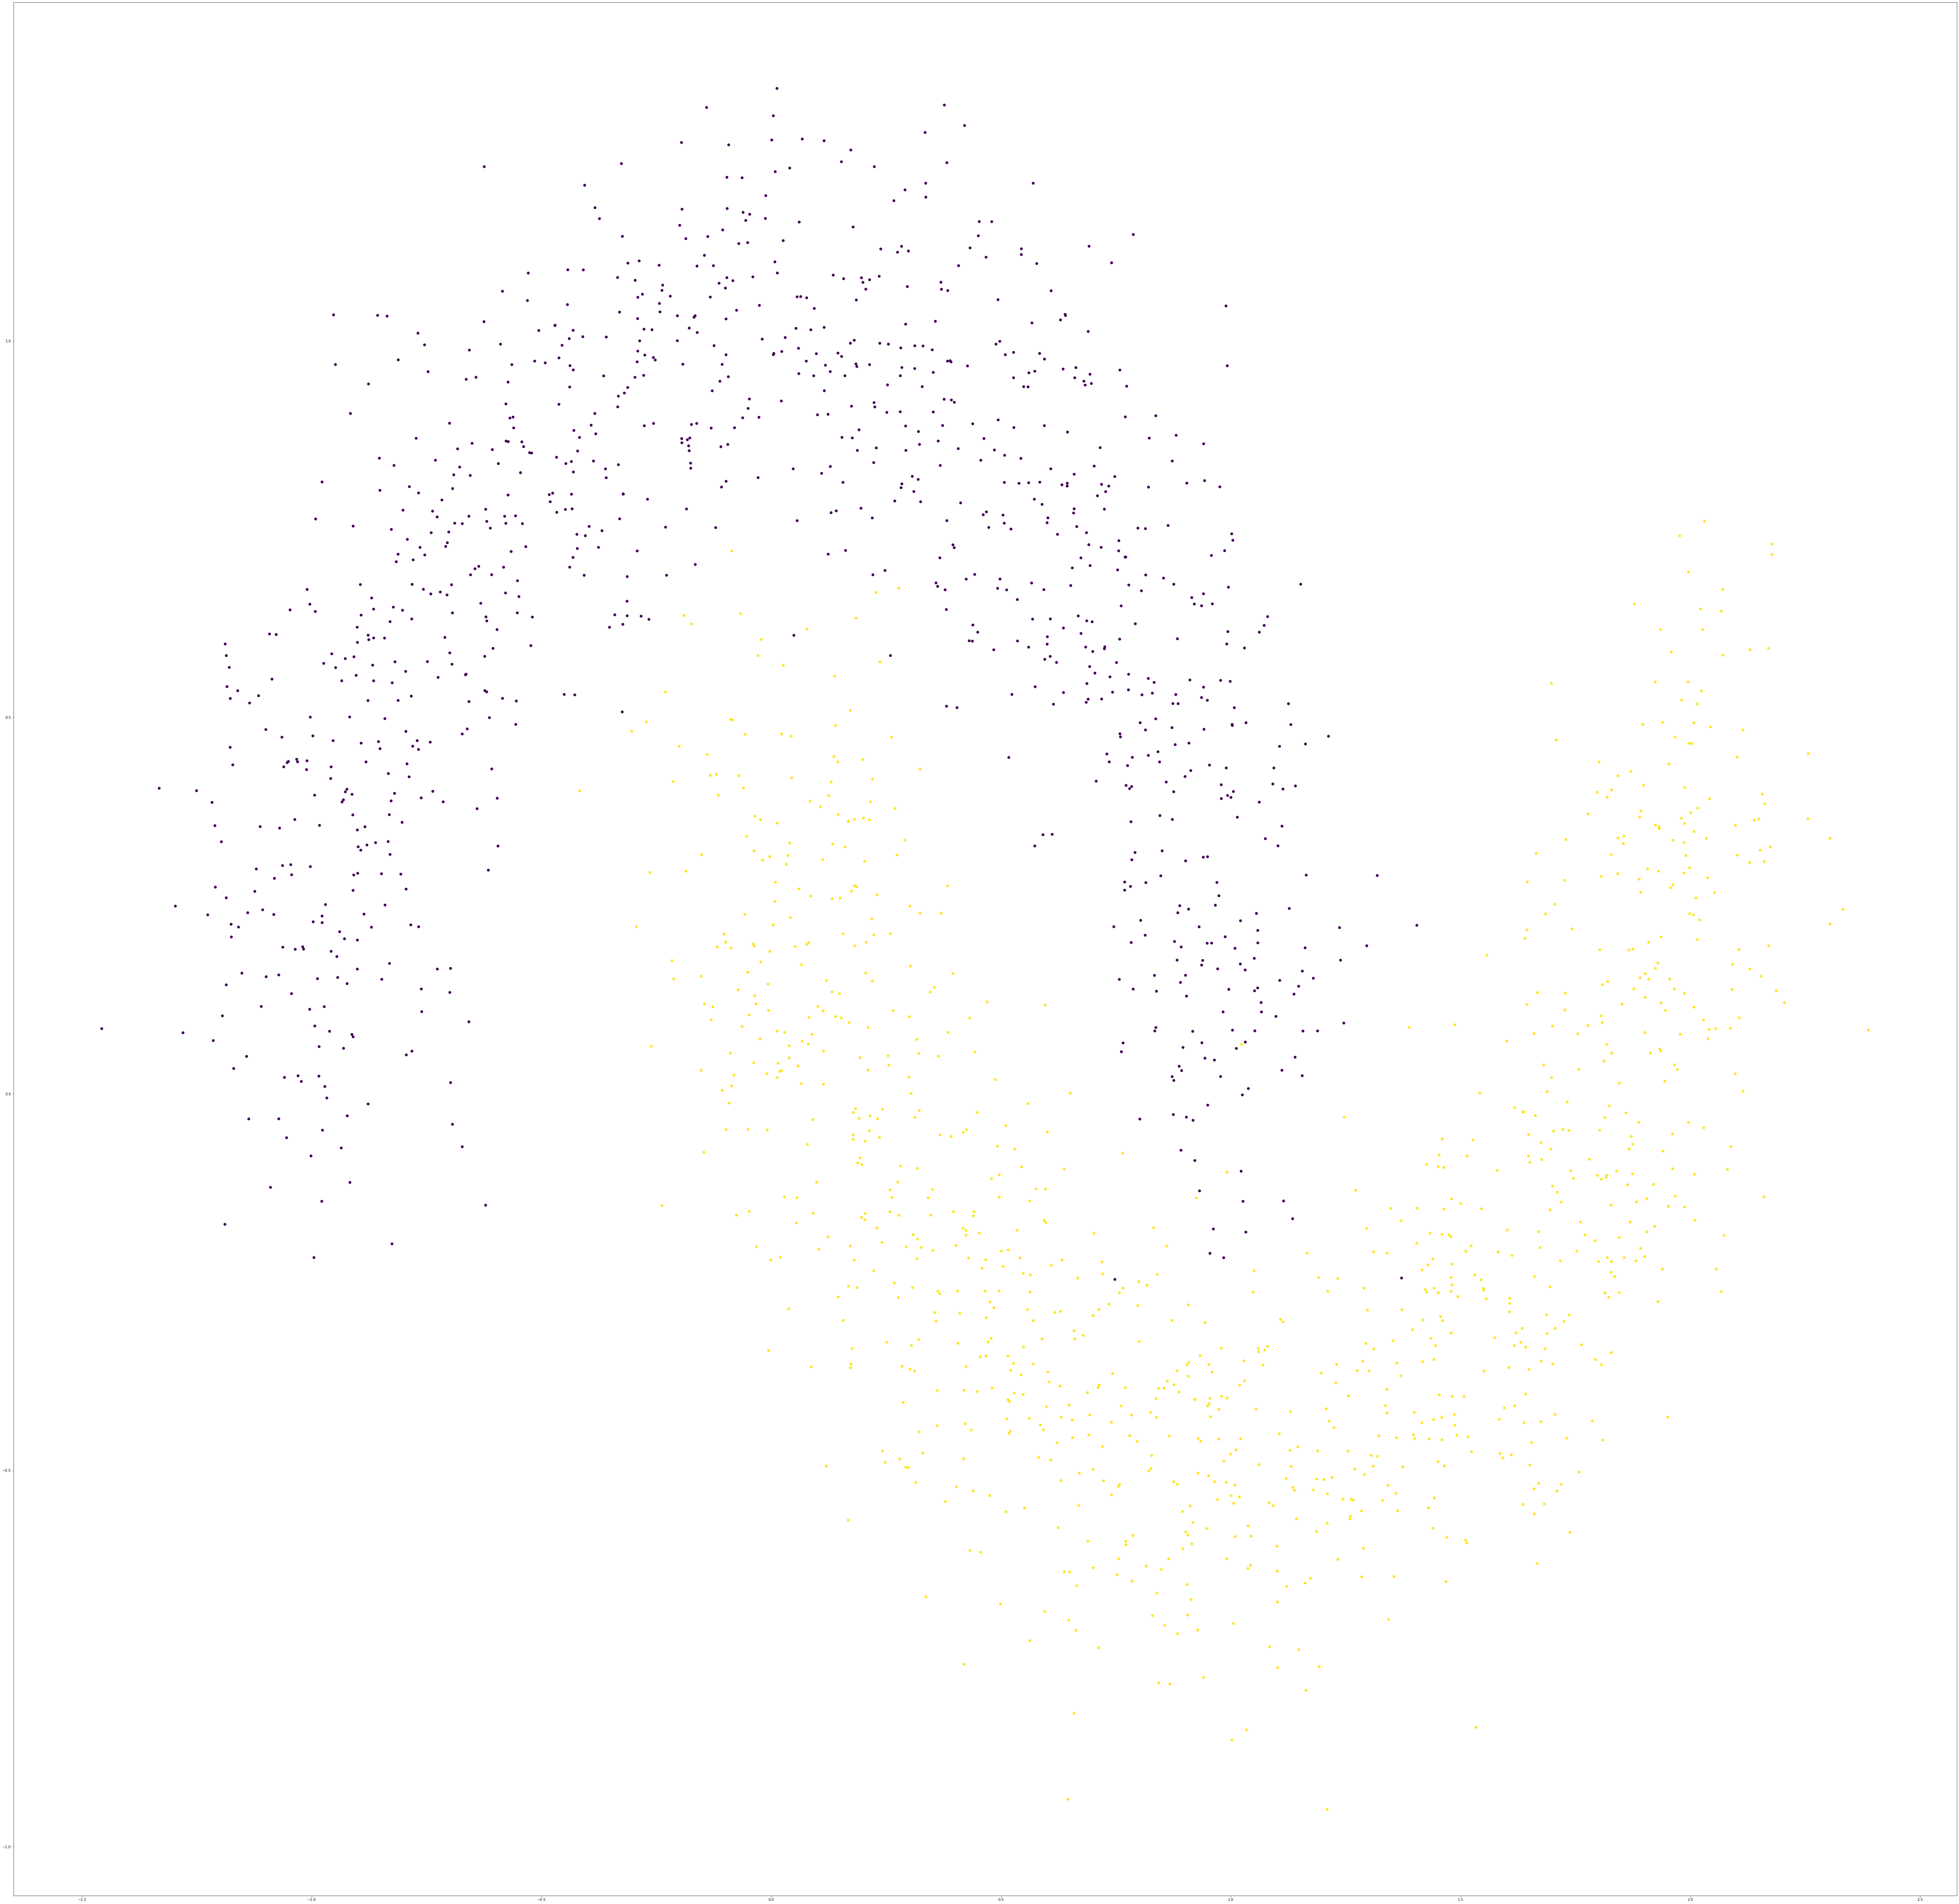

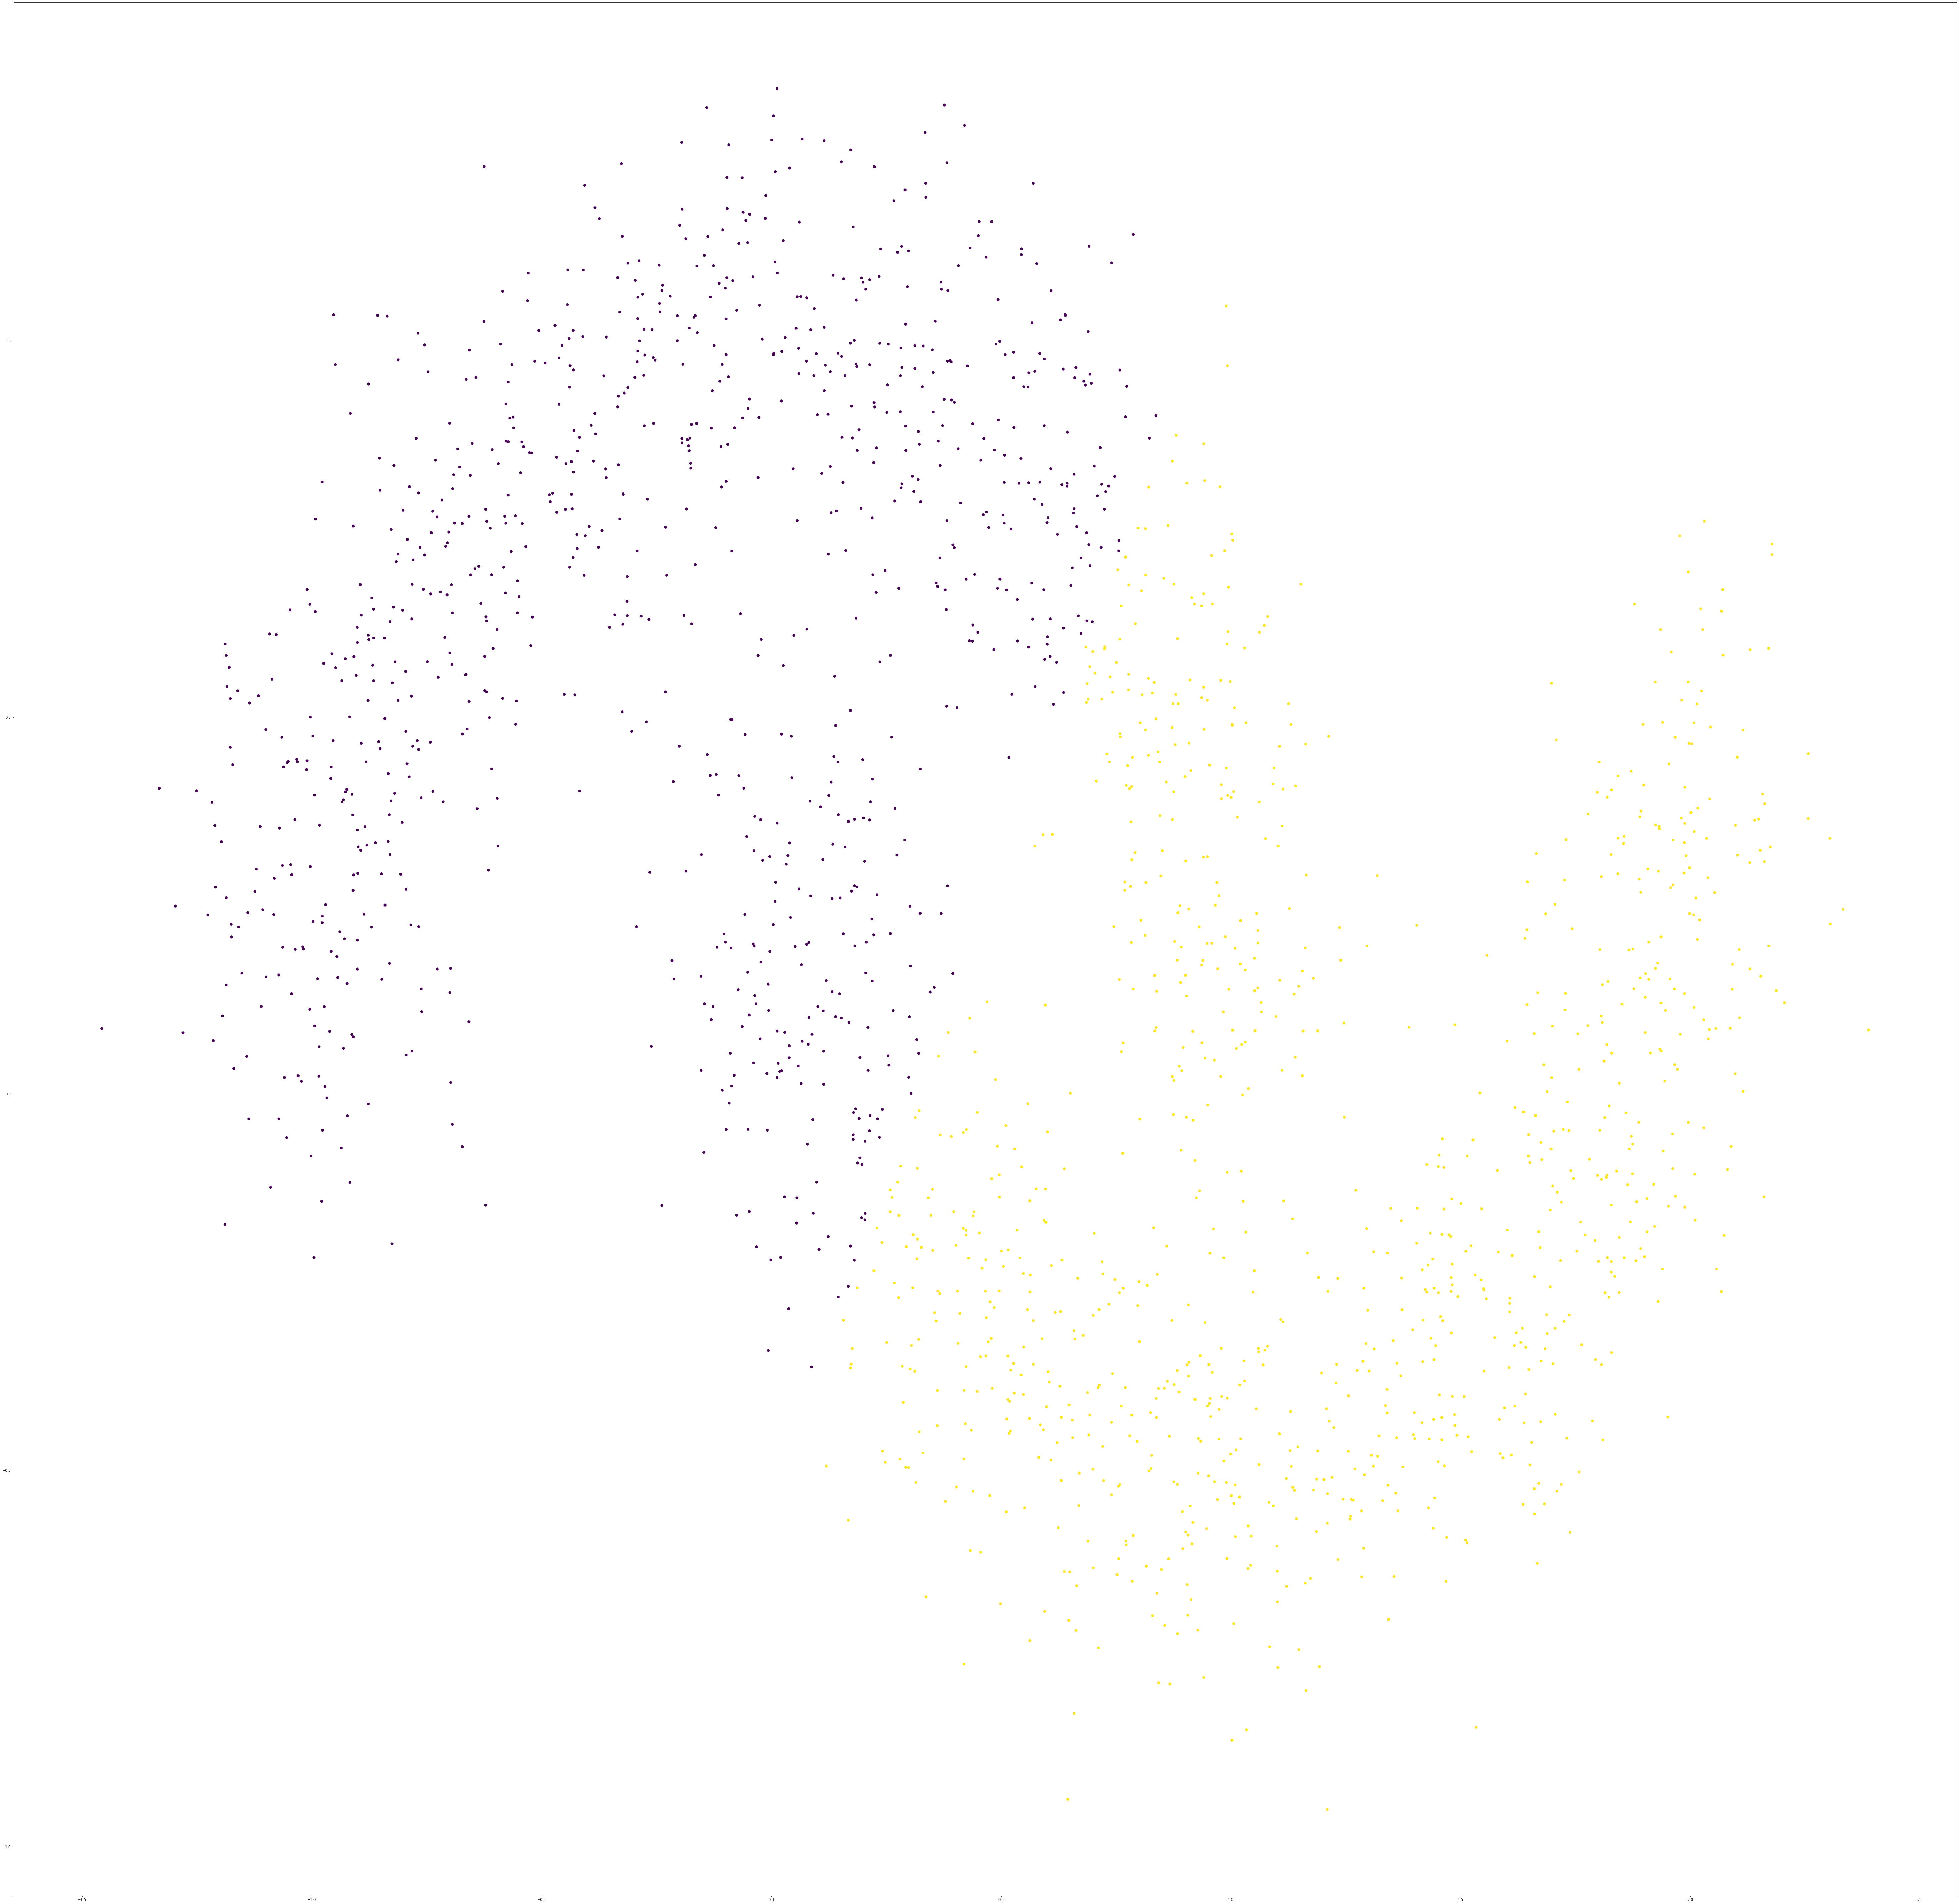

In [43]:
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=part3_Y_values_2, s=50, cmap='viridis')
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=clustering_set2, s=50, cmap='viridis')

print(metrics.confusion_matrix(part3_Y_values_2, clustering_set2))
print(metrics.classification_report(part3_Y_values_2, clustering_set2))

In [44]:
%%timeit
clustering = SpectralClustering(n_clusters=2,assign_labels="kmeans",random_state=0).fit(X)
clustering_set2 = clustering.fit_predict(X)

1.75 s ± 73.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:

###############################Running algorithm###########################################
clustering = SpectralClustering(n_clusters=2,assign_labels="kmeans",random_state=0).fit(X)
clustering_set2 = clustering.fit_predict(X)
if clustering_set2[0]!=0:
    for i in range(len(clustering_set2)):
        if clustering_set2[i] == 1:
            clustering_set2[i] = 0
        else:
            clustering_set2[i] = 1
print(clustering_set2)

###############################Calculating WSS###########################################

X_0_0 = np.sum(X_0[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_0_1 = np.sum(X_0[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)

X_1_0 = np.sum(X_1[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_1_1 = np.sum(X_1[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)

#Computing the WSS
wss_1 = 0;
wss_2 = 0;

for i in range(len(clustering_set2)):
    if clustering_set2[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if clustering_set2[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)

WSS_within = wss_1 + wss_2 
print("WSS value for LargeData2 2nd run: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(clustering_set2==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(clustering_set2==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))

BSS = BSS_0+BSS_1
print("BSS value for 1st algorithm 2nd run: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value for 1st algorithm 2nd run: ", SSE)

[0 1 1 ... 1 1 0]
WSS value for LargeData2 2nd run: [866.9537589]
BSS value for 1st algorithm 2nd run: 1212.1988436876827
SSE Value for 1st algorithm 2nd run:  [2079.15260259]


[[762 238]
 [214 786]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.77      0.79      0.78      1000

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



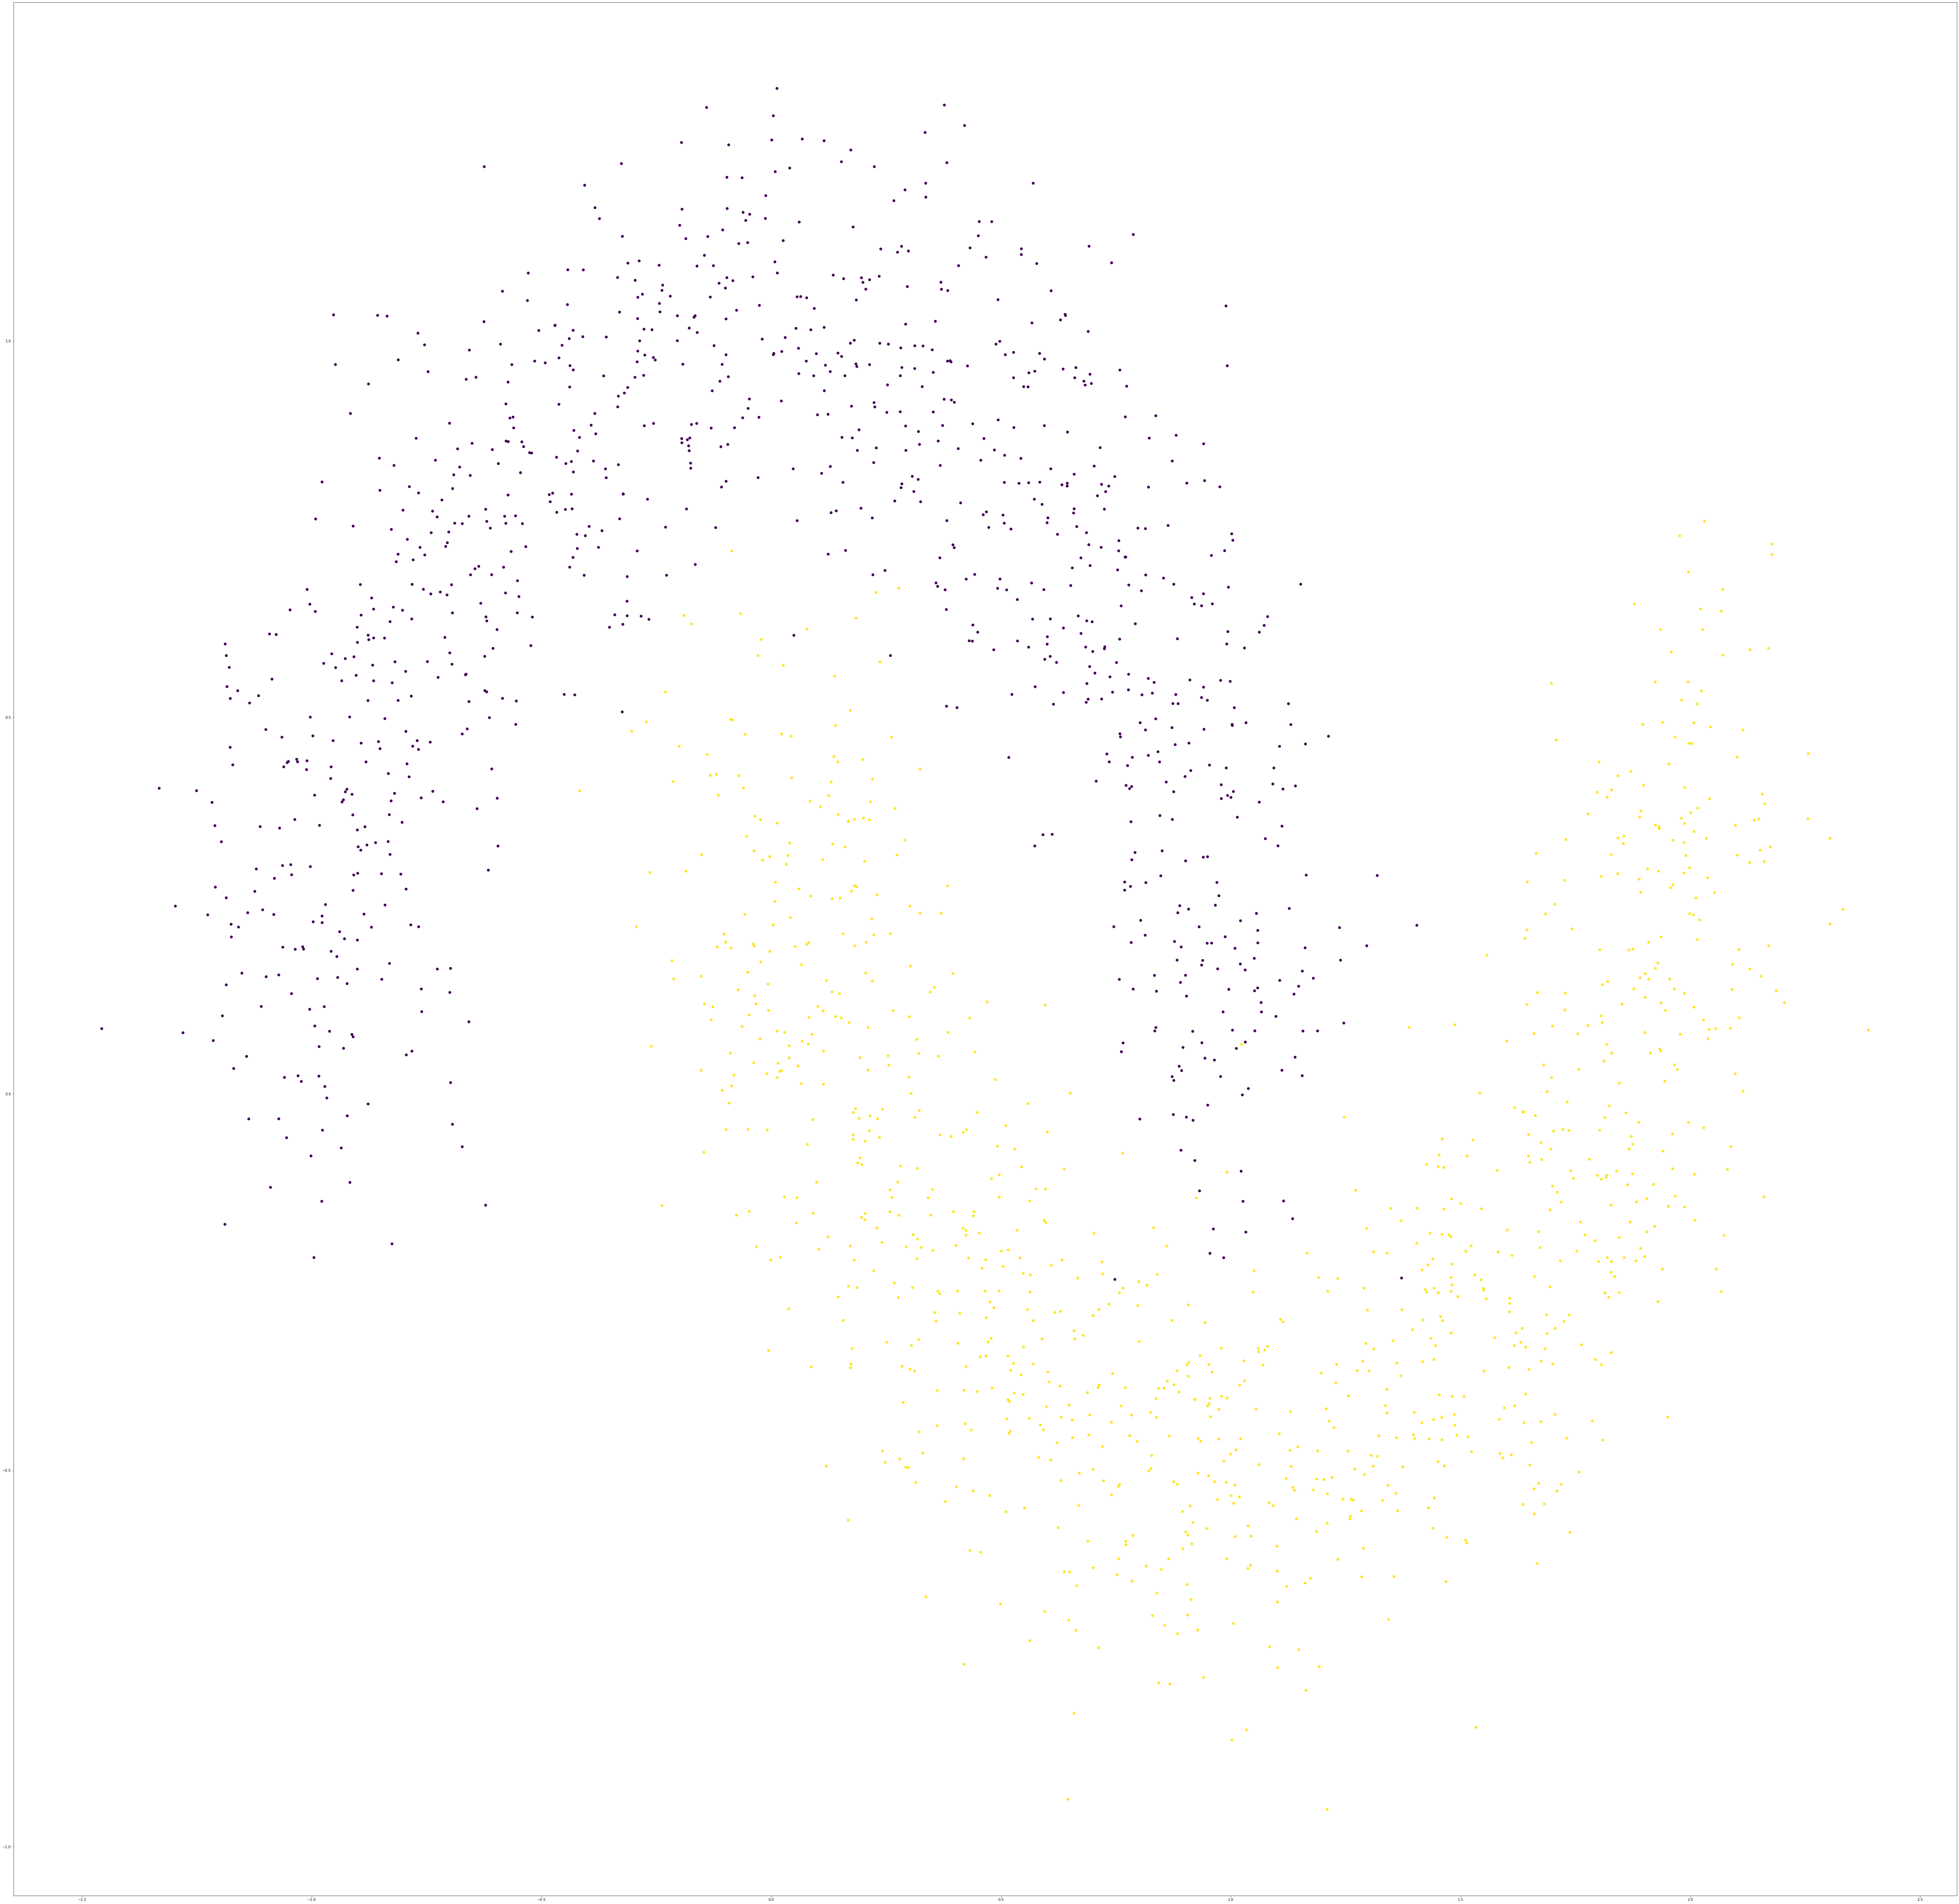

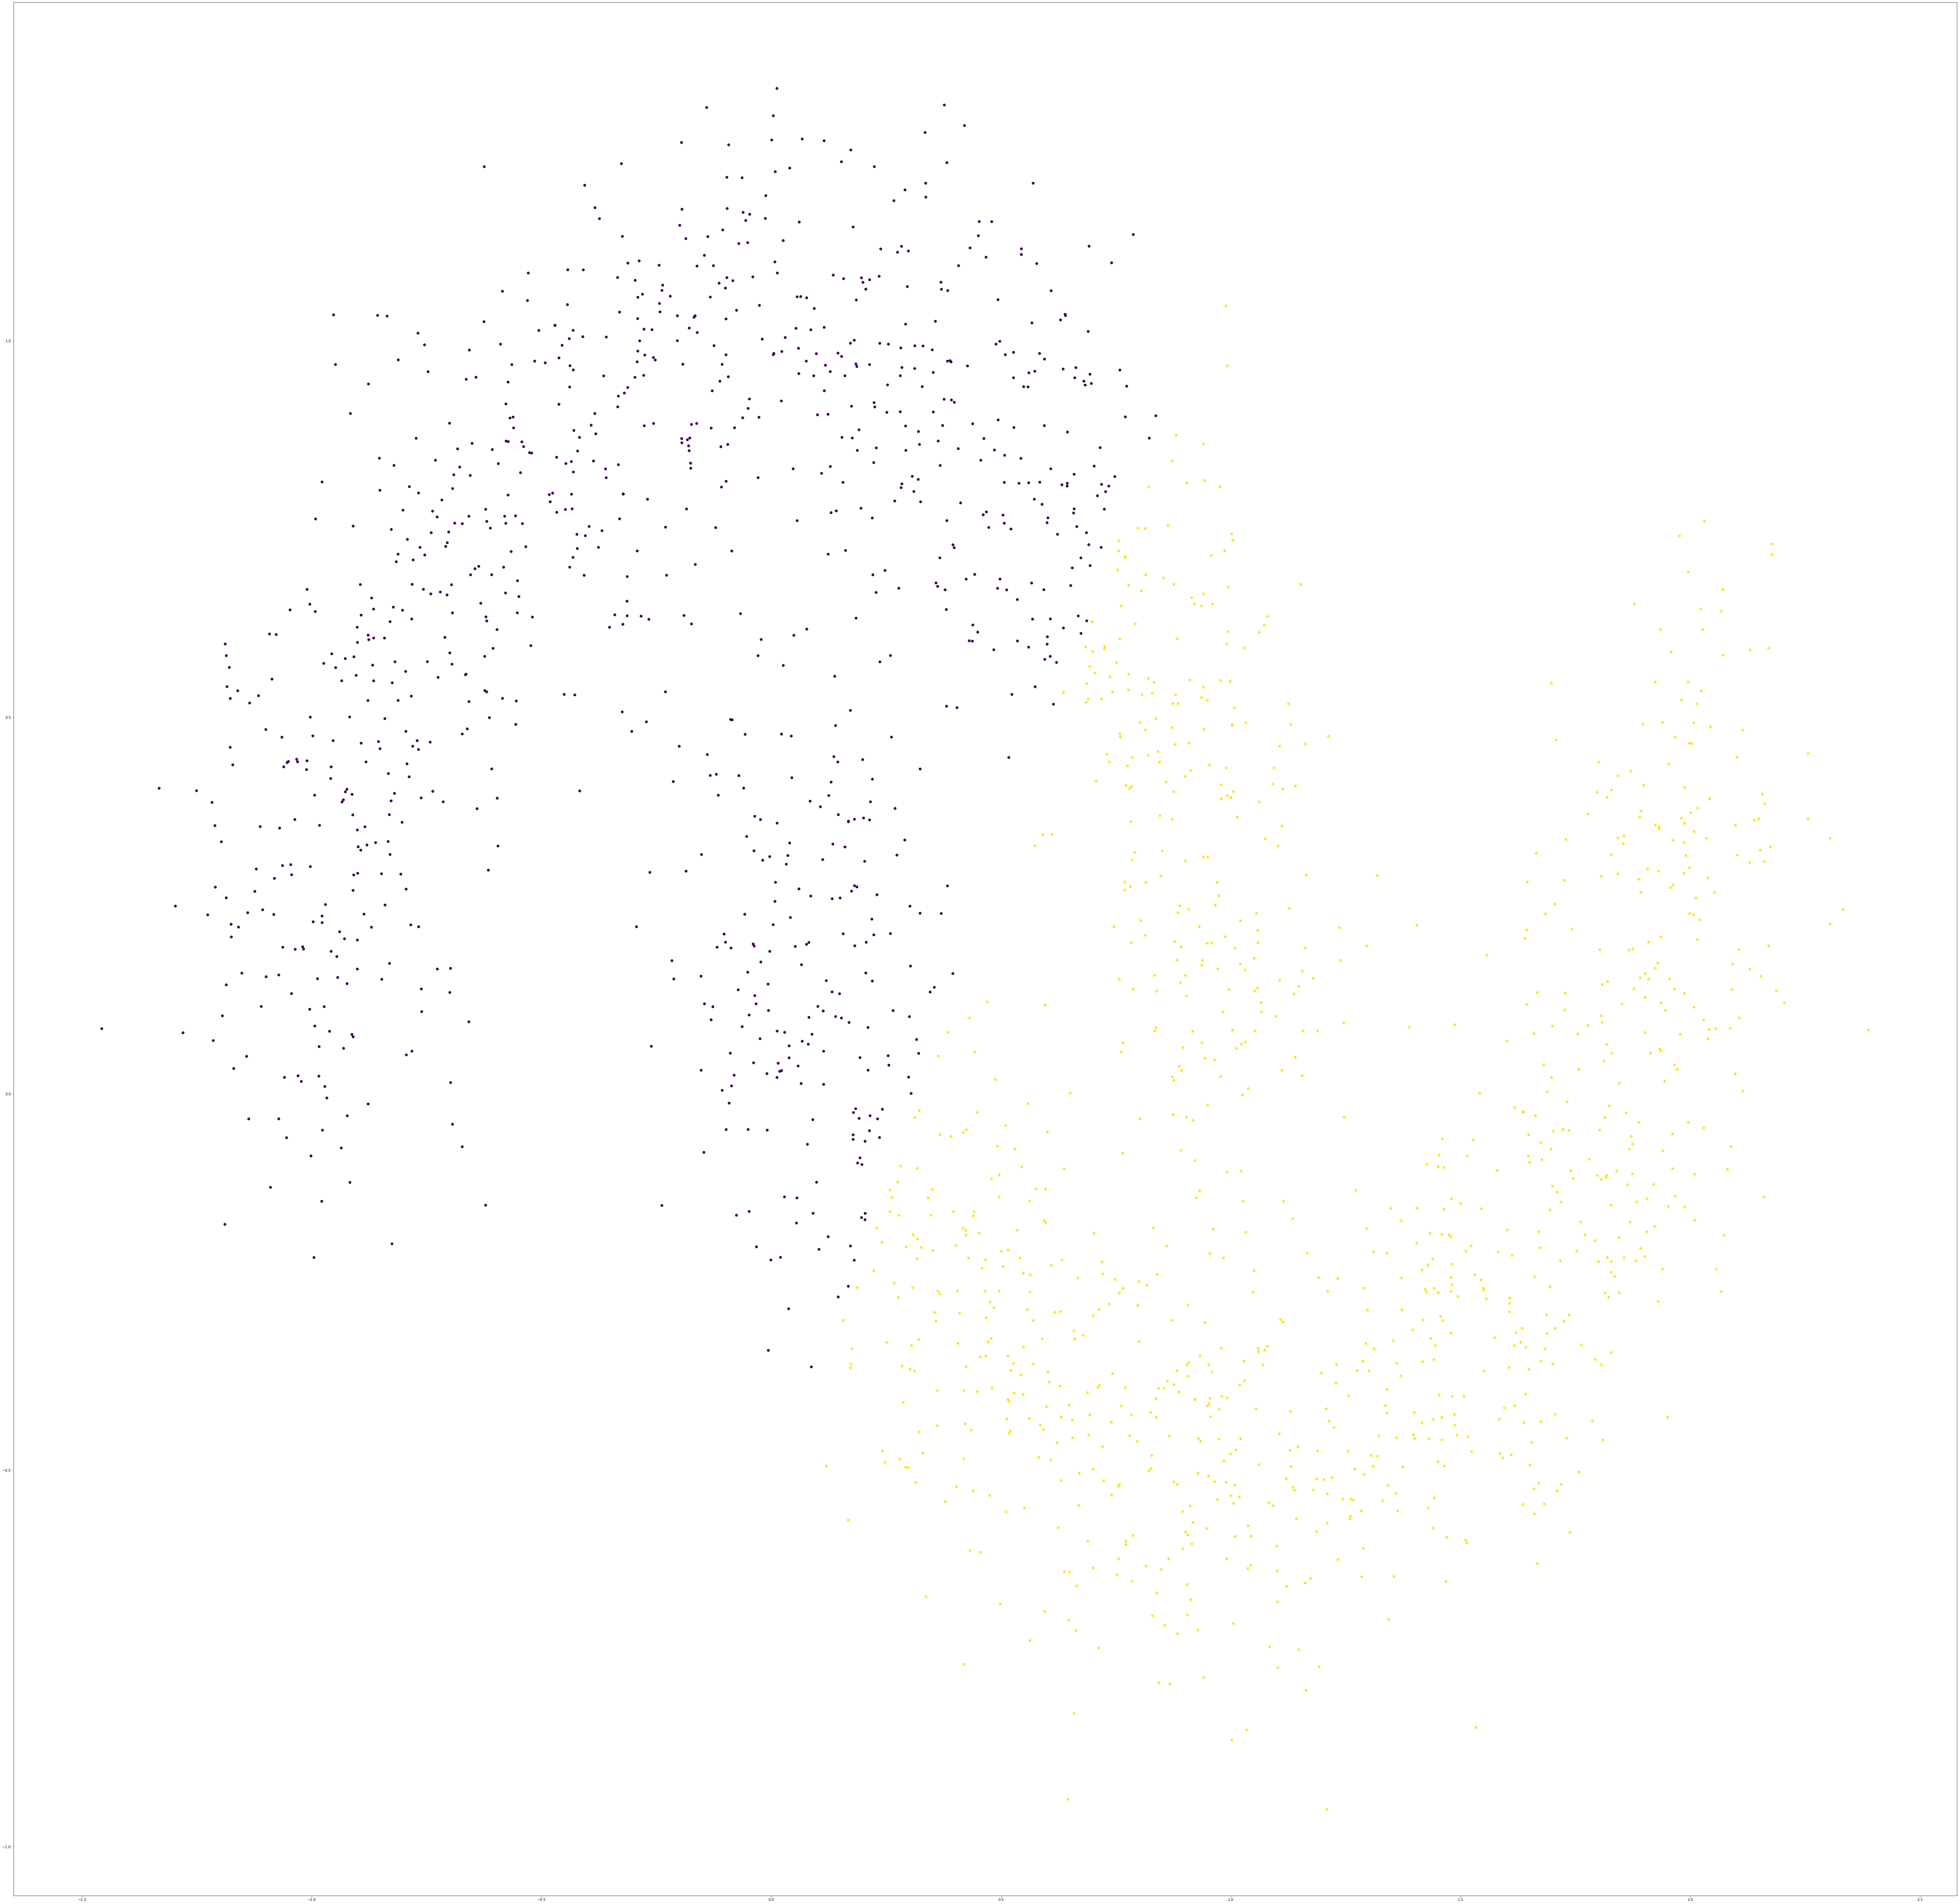

In [46]:
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=part3_Y_values_2, s=50, cmap='viridis')
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=clustering_set2, s=50, cmap='viridis')

print(metrics.confusion_matrix(part3_Y_values_2, clustering_set2, labels=[0, 
1]))
print(metrics.classification_report(part3_Y_values_2, clustering_set2, labels=[0, 
1]))

***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

- *The first thing that I was able to obseverse from the experiments was that I was able to have a very desent successful test. After running the confusion matrix I was able to see the precision and accuracy that this algorithm provided compared to the true values. My accuarcy seemed to be at 78%. While it wasn't the best I also used the parameter of 'discretize' labels compared to Knn labels. The documentation said that this addressed an issue that Knn appears to have when classifying information. It is an approach which is less sensitive to random initialization. On the other when using 'kmeans' my accuracy dropped by 1%. Which really isn't saying much.*
- *Preferred configuration settings.* 
    - *I ending up setting the cluster values to 2 for each since we already know that there are only 2 clusters for this part.*
    - *I preferred to use assign_labels{‘discretize’} because it ended up giving me a better output. Not something super great, but yet better.* 

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
***

### Algorithm 2
- The final algorithm that I chose was to use the Agglomerative Clustering. I reason I picked this algorithm was because it had to also direct involve clustering. Along with that, it supported Large n_samples and n_clusters. And most exciting, it had to do with pairwise distance. 

In [47]:
large2_data = pd.read_csv('large2_Xydf.csv')
Y_values_2 = large2_data.iloc[:, 3:].to_numpy()
part5_Y_values = Y_values_2
X_0 = (large2_data.iloc[:, 1:2]).to_numpy()
X_1 = (large2_data.iloc[:, 2:-1]).to_numpy()
X = large2_data.iloc[:, 1:-1]
X = X.to_numpy()

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

In [48]:
%%timeit
clustering = AgglomerativeClustering().fit(X)
clustering_set2 = clustering.fit_predict(X)

498 ms ± 37.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
###############################Running algorithm###########################################
clustering = AgglomerativeClustering().fit(X)
clustering_set2 = clustering.fit_predict(X)
if clustering_set2[0]!=0:
    for i in range(len(clustering_set2)):
        if clustering_set2[i] == 1:
            clustering_set2[i] = 0
        else:
            clustering_set2[i] = 1
print(clustering_set2)
###############################Calculating WSS###########################################

X_0_0 = np.sum(X_0[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_0_1 = np.sum(X_0[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)

X_1_0 = np.sum(X_1[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_1_1 = np.sum(X_1[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)

#Computing the WSS
wss_1 = 0;
wss_2 = 0;

for i in range(len(clustering_set2)):
    if clustering_set2[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if clustering_set2[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)

WSS_within = wss_1 + wss_2 
print("WSS value: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(clustering_set2==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(clustering_set2==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))

BSS = BSS_0+BSS_1
print("BSS value: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value: ",SSE)

[0 1 1 ... 1 1 1]
WSS value: [1072.75427438]
BSS value: 1006.398328204987
SSE Value:  [2079.15260259]


[[511 489]
 [  9 991]]
              precision    recall  f1-score   support

           0       0.98      0.51      0.67      1000
           1       0.67      0.99      0.80      1000

    accuracy                           0.75      2000
   macro avg       0.83      0.75      0.74      2000
weighted avg       0.83      0.75      0.74      2000



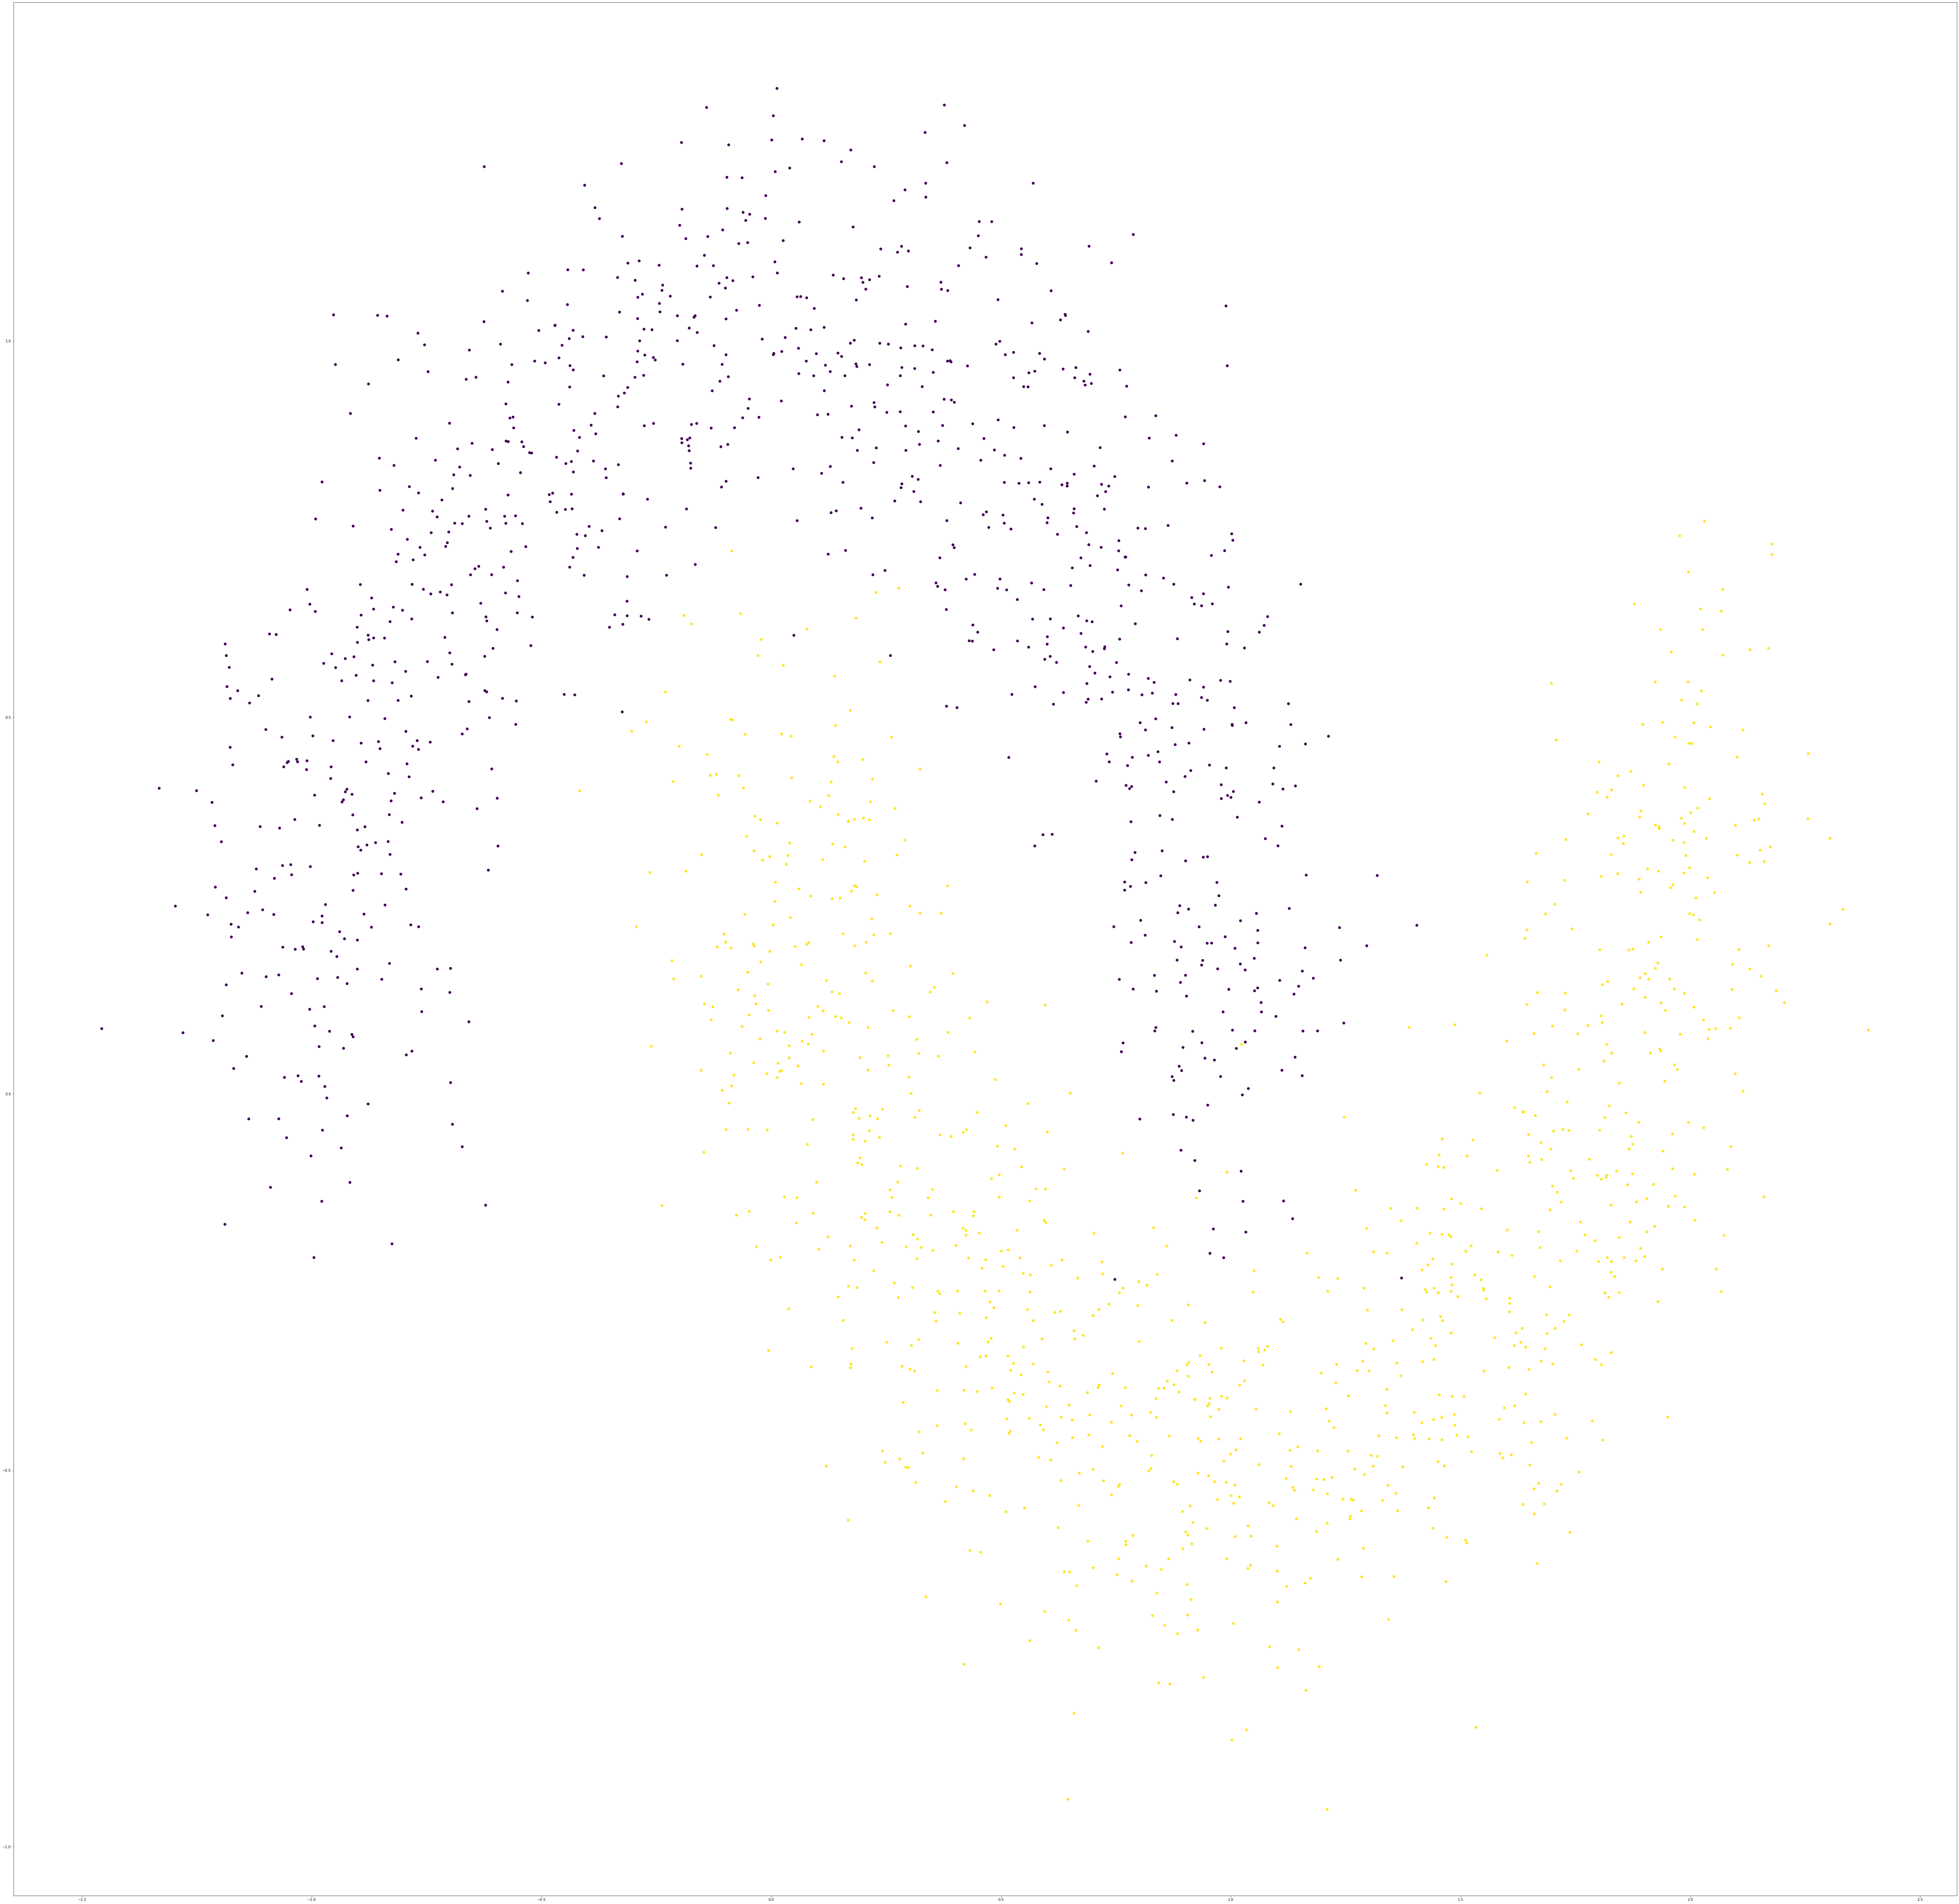

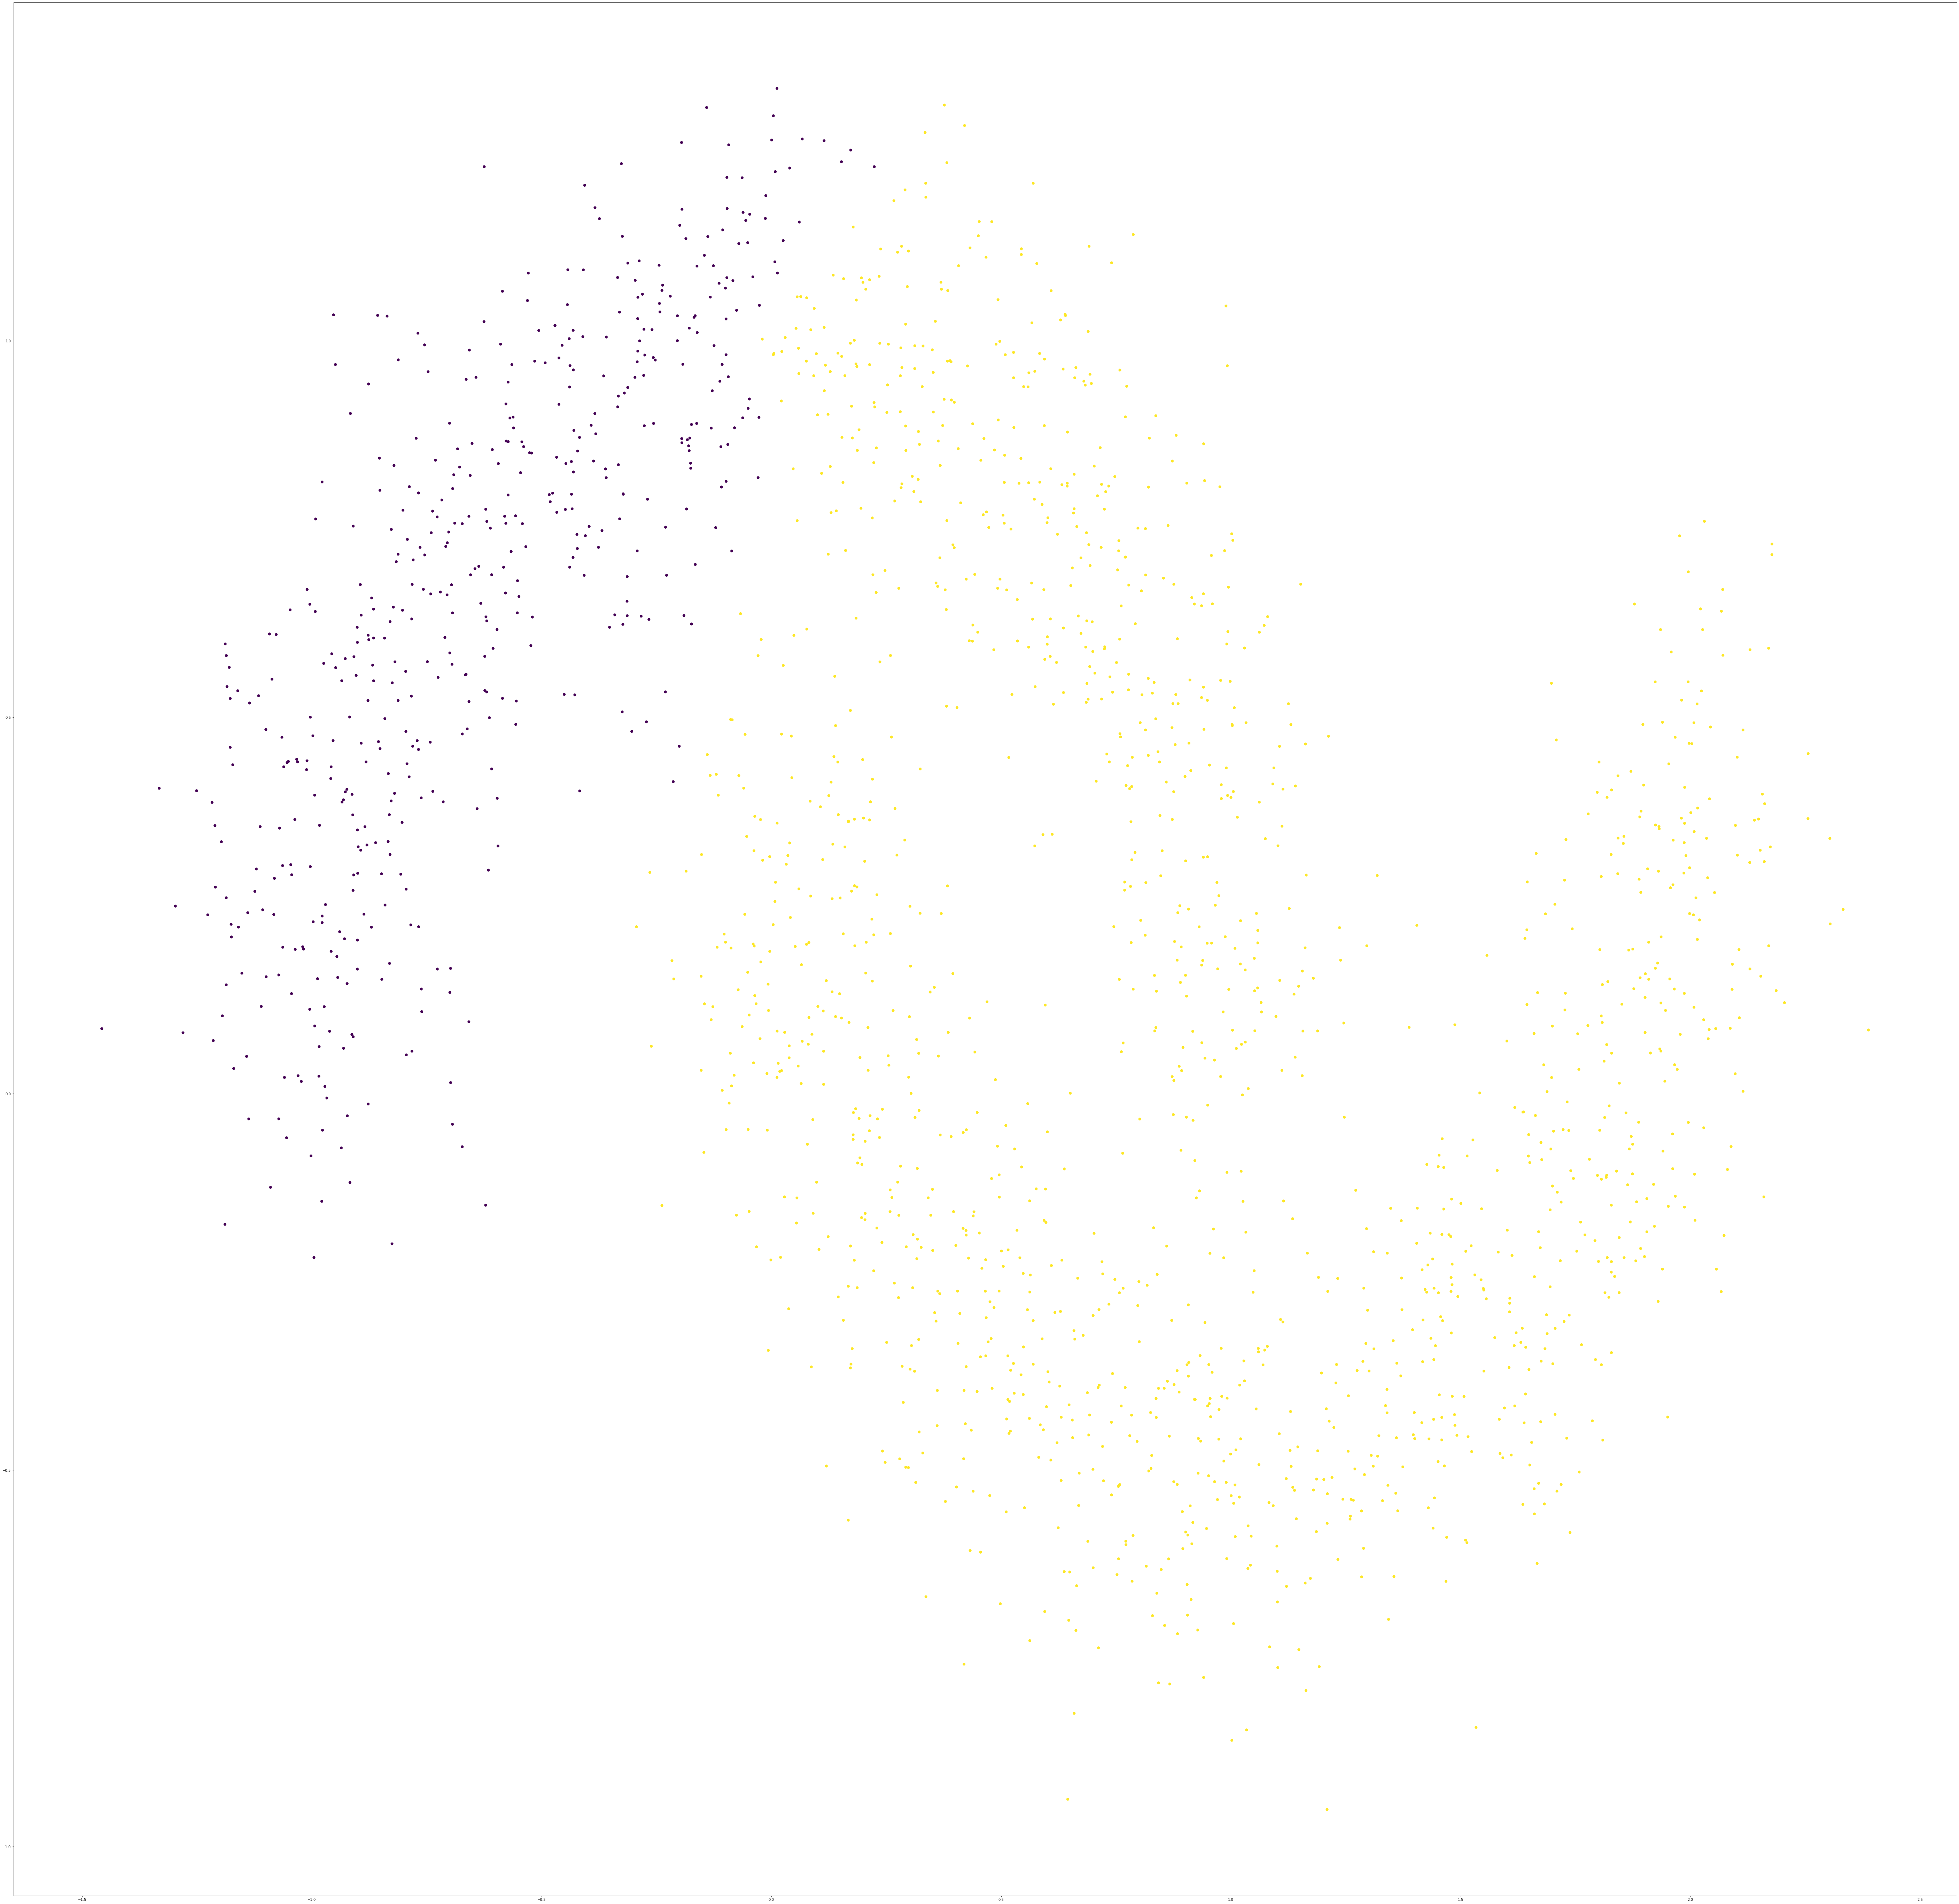

In [50]:
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=part5_Y_values, s=50, cmap='viridis')
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=clustering_set2, s=50, cmap='viridis')

print(metrics.confusion_matrix(part5_Y_values, clustering_set2, labels=[0, 
1]))
print(metrics.classification_report(part5_Y_values, clustering_set2, labels=[0, 
1]))

In [51]:
%%timeit
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
clustering_set2 = clustering.fit_predict(X)

504 ms ± 68.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
###############################Running algorithm###########################################
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
clustering_set2 = clustering.fit_predict(X)
print(clustering_set2)
###############################Calculating WSS###########################################

X_0_0 = np.sum(X_0[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_0_1 = np.sum(X_0[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)
X_0_2 = np.sum(X_0[np.where(clustering_set2 == 2)])/np.count_nonzero(clustering_set2==2)

X_1_0 = np.sum(X_1[np.where(clustering_set2 == 0)])/np.count_nonzero(clustering_set2==0)
X_1_1 = np.sum(X_1[np.where(clustering_set2 == 1)])/np.count_nonzero(clustering_set2==1)
X_1_2 = np.sum(X_1[np.where(clustering_set2 == 2)])/np.count_nonzero(clustering_set2==2)
#Computing the WSS
wss_1 = 0
wss_2 = 0
wss_3 = 0
for i in range(len(clustering_set2)):
    if clustering_set2[i] == 0:
        wss_1 += pow((X_0_0-X_0[i]),2) + pow((X_1_0-X_1[i]),2)
    if clustering_set2[i] == 1:
        wss_2 += pow((X_0_1-X_0[i]),2) + pow((X_1_1-X_1[i]),2)
    if clustering_set2[i] == 2:
        wss_3 += pow((X_0_2-X_0[i]),2) + pow((X_1_2-X_1[i]),2)
WSS_within = wss_1 + wss_2 + wss_3
print("WSS value: " + str(WSS_within))

############################### Calculating BSS value#############
average_mean_X0 = np.average(X_0) 
average_mean_X1 = np.average(X_1)

BSS_0 = np.count_nonzero(clustering_set2==0)*(pow(average_mean_X0 - X_0_0,2) + pow(average_mean_X1 - X_1_0,2))
BSS_1 = np.count_nonzero(clustering_set2==1)*(pow(average_mean_X0 - X_0_1,2) + pow(average_mean_X1 - X_1_1,2))
BSS_2 = np.count_nonzero(clustering_set2==2)*(pow(average_mean_X0 - X_0_2,2) + pow(average_mean_X1 - X_1_2,2))

BSS = BSS_0+BSS_1+BSS_2
print("BSS value: " + str(BSS))
#Now we calculate the SSE values
SSE = BSS + WSS_within
print("SSE Value: ",SSE)

[1 2 0 ... 2 0 0]
WSS value: [633.05213801]
BSS value: 1446.1004645775927
SSE Value:  [2079.15260259]


[[488 511]
 [557   9]]
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1000
           1       0.02      0.01      0.01      1000

   micro avg       0.32      0.25      0.28      2000
   macro avg       0.24      0.25      0.24      2000
weighted avg       0.24      0.25      0.24      2000



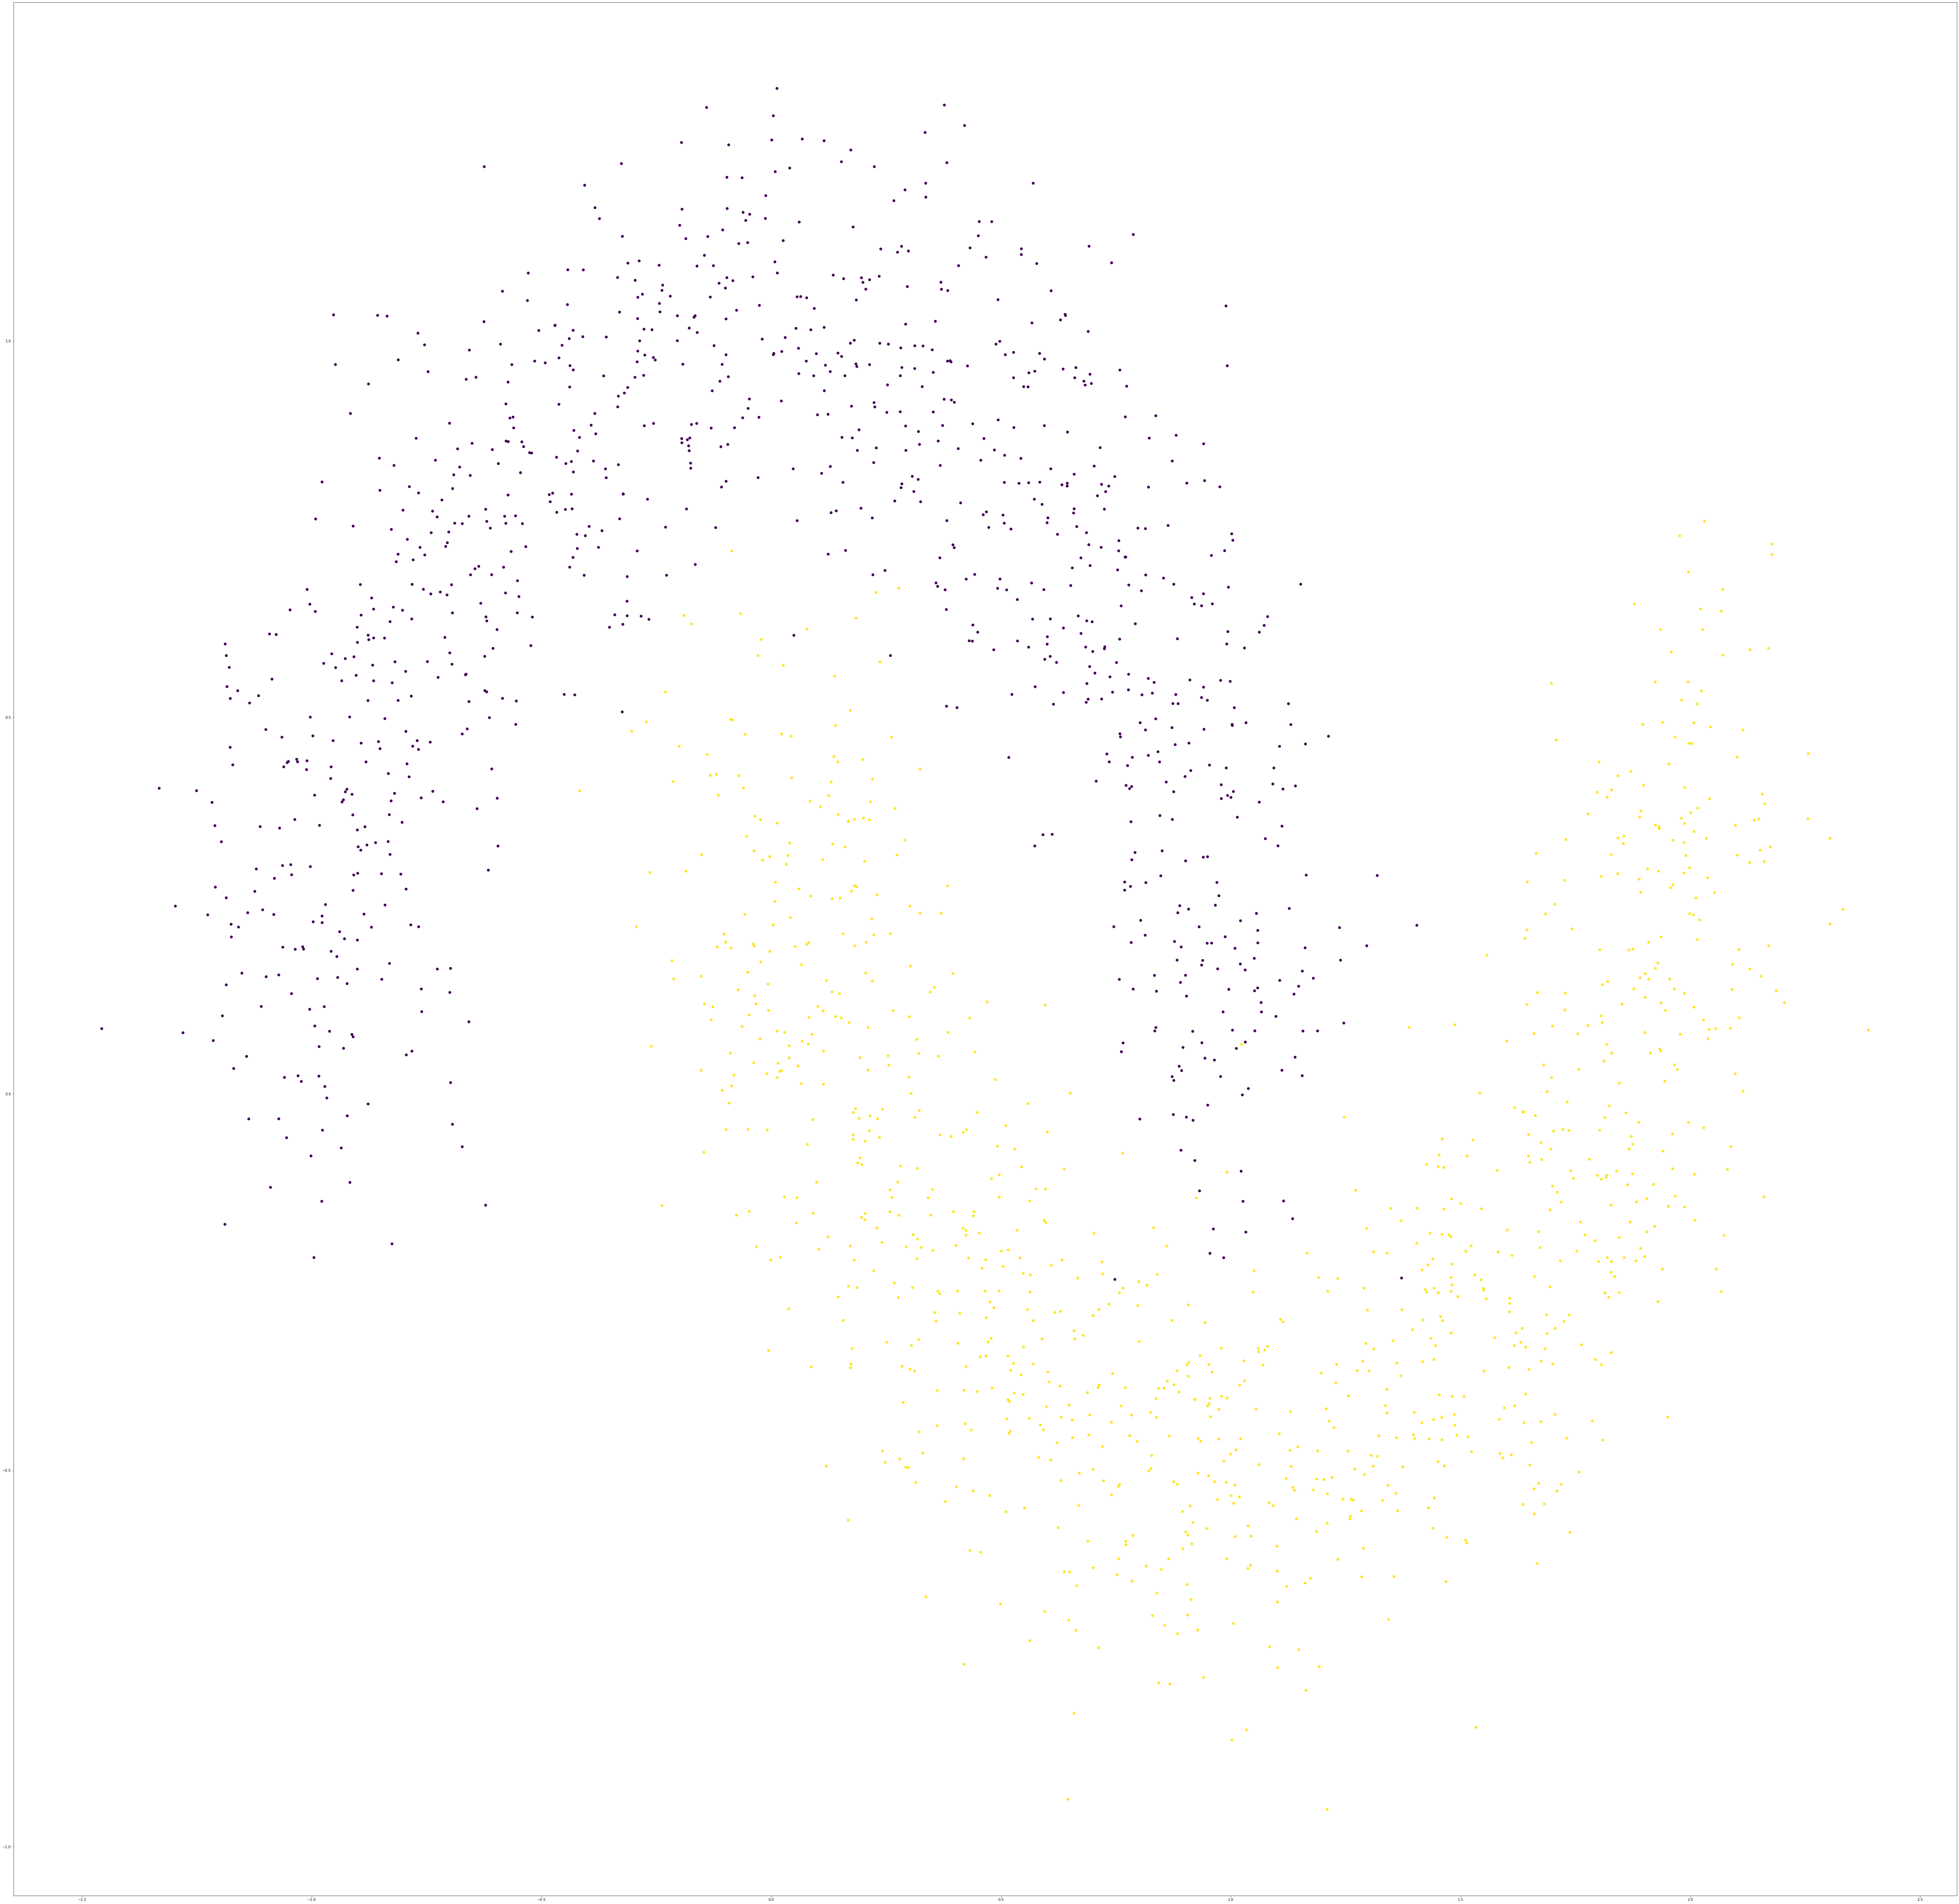

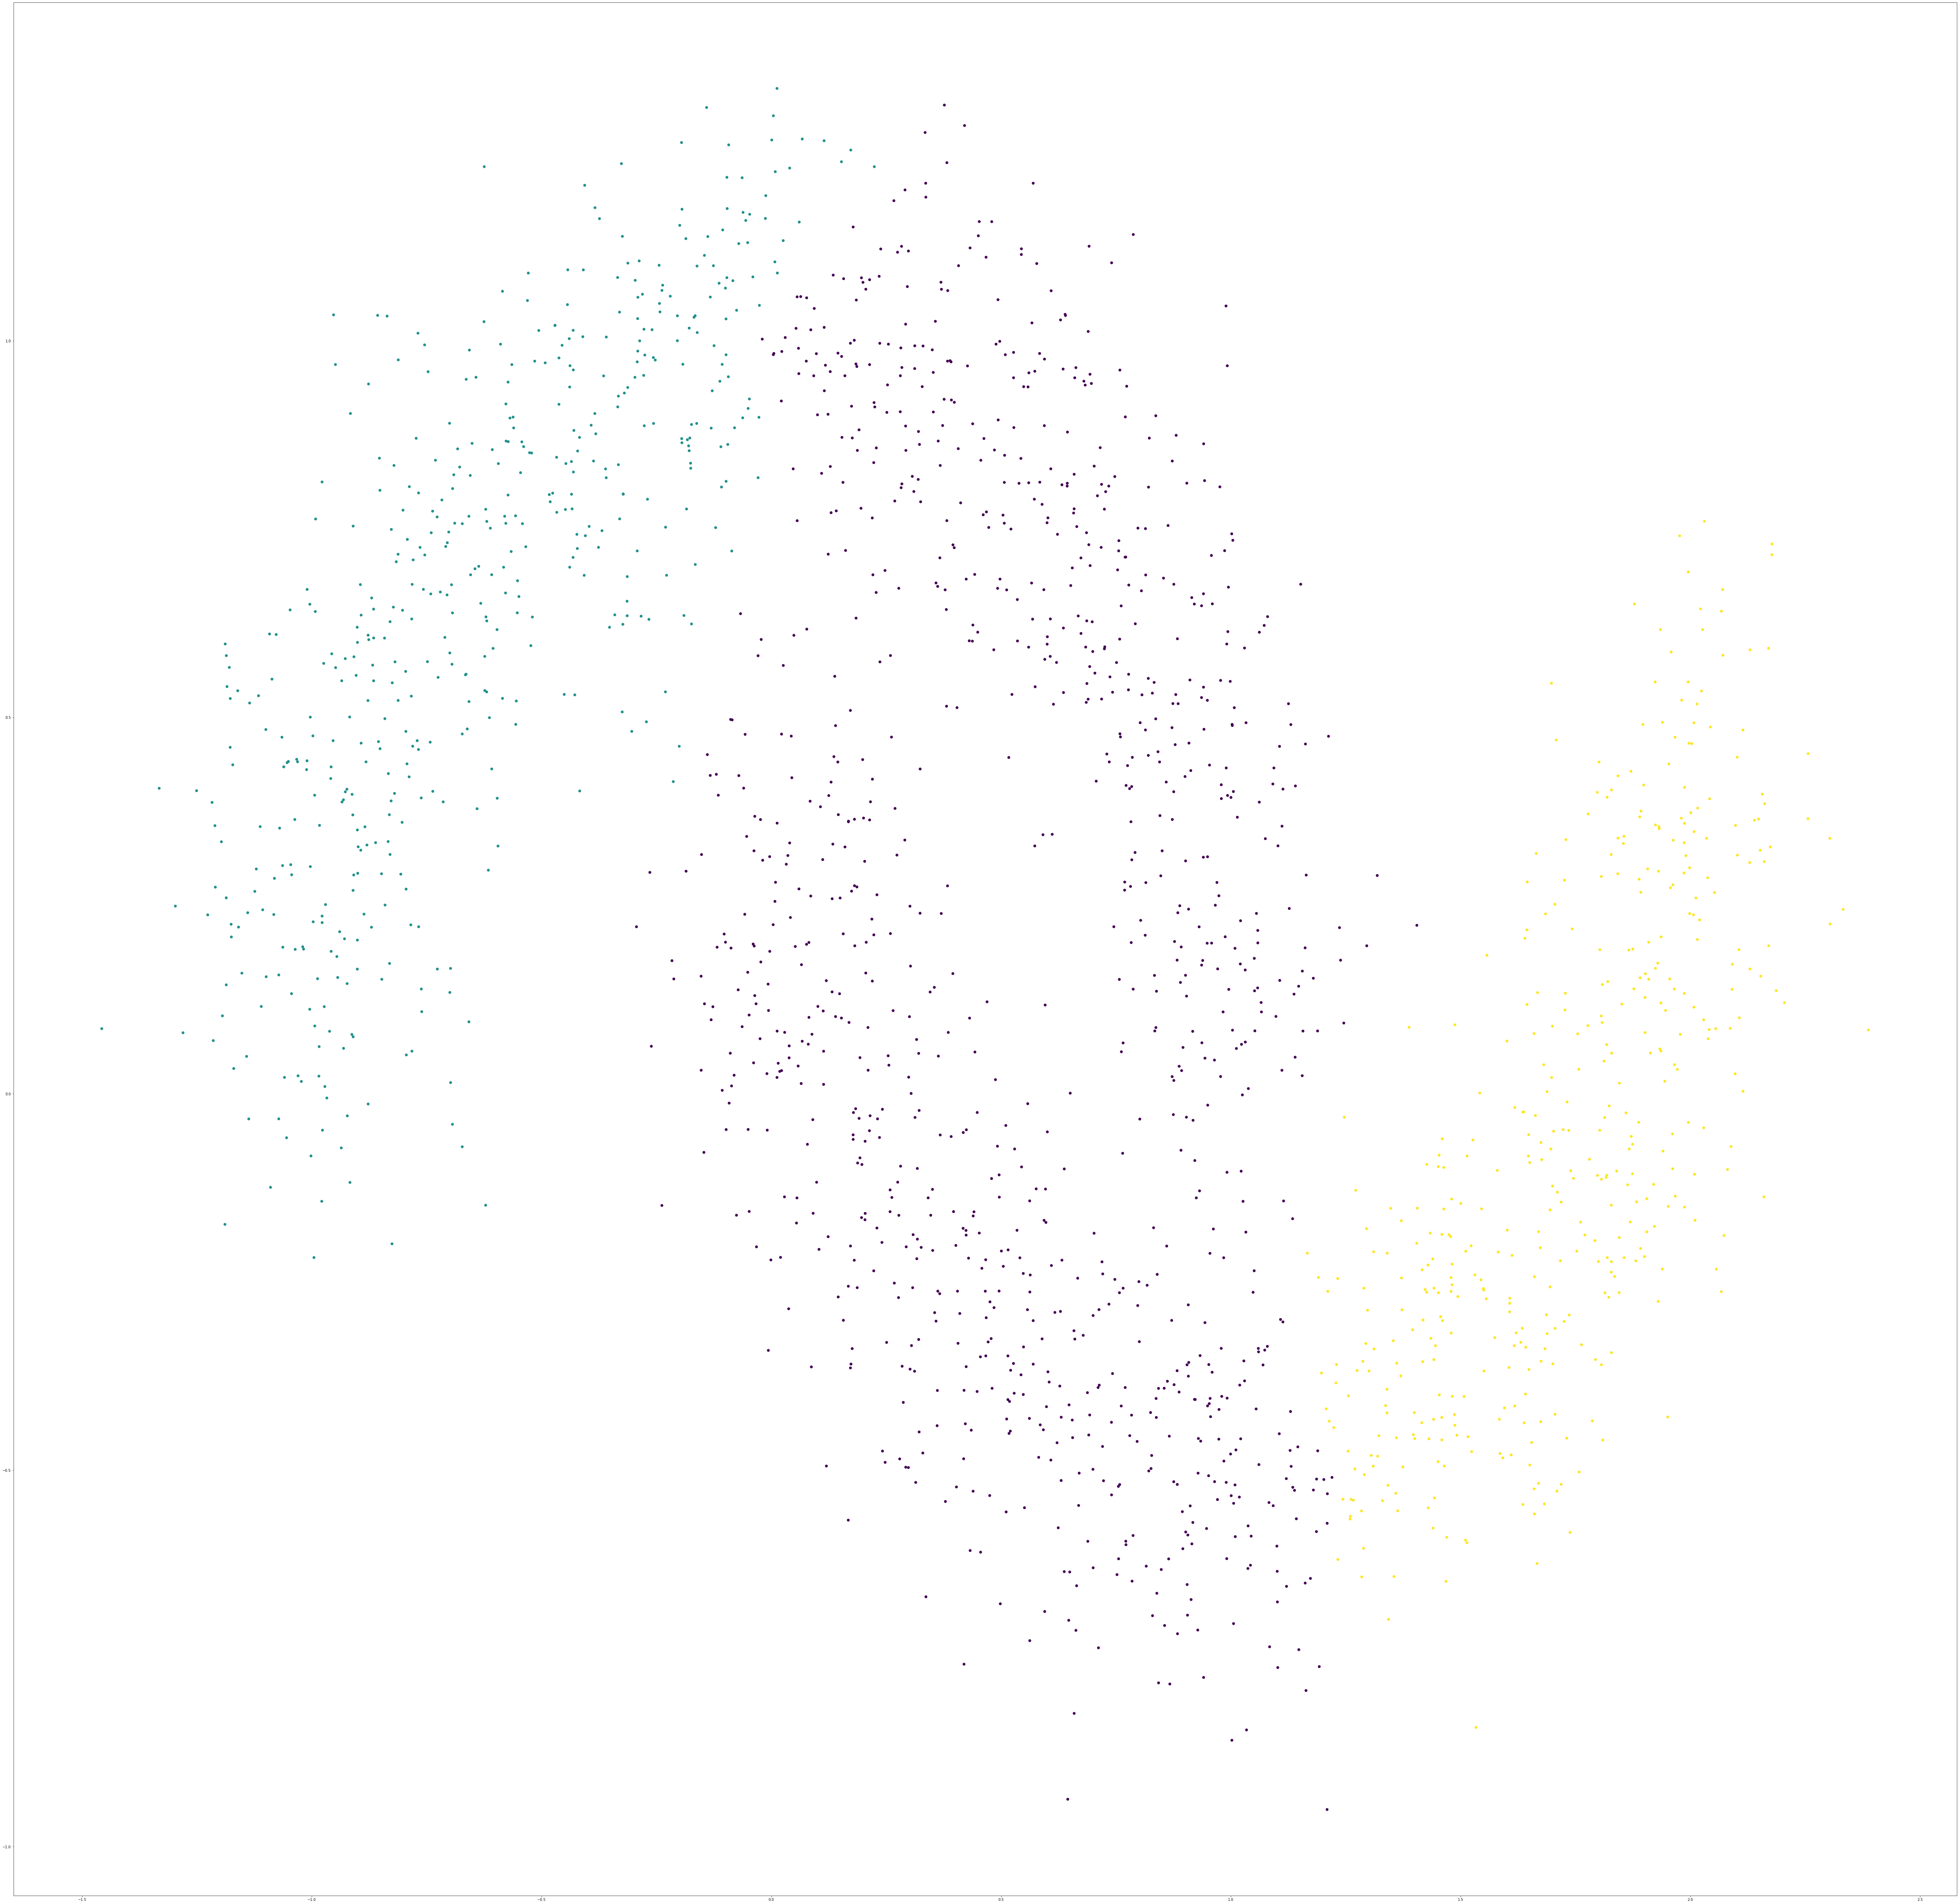

In [53]:
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=part5_Y_values, s=50, cmap='viridis')
plt.figure(figsize=(100,100))
plt.scatter(X[:, 0], X[:, 1], c=clustering_set2, s=50, cmap='viridis')

print(metrics.confusion_matrix(part5_Y_values, clustering_set2, labels=[0, 
1]))
print(metrics.classification_report(part5_Y_values, clustering_set2, labels=[0, 
1]))

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

What do you observe or conclude from these experiments?
- *What I was able to conclude from this expirement was that running this algorithm had way more limitations. I chose to run the algorithm AgglomerativeClustering. When using the default 2 clusters, I was able to get a 75% accuracy and was also able to optain a 98% precision when calculating my 1 values. The biggest flaw was calculating the 1's values.*

Which is your “preferred” clustering (configuration settings, if any), and why?
- *I was very limited in what I could do with algorithm function. I tried to change several paramaters from the default ones and wasn't super successful. For example, I tried using 'manhattan' distance and jupytorNotebook told me that wasn't allowed for this type of problem. So instead I just ran by second test with 3 clusters instead of 2.*
Support this with statistics and/or graphs.

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

### Run time performance
        - Kmeans alrorithm
            - 61.7 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
        - 1st algorithm
            - 1.77 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
        - 2nd algorithm 
            - 440 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
### Accuracy Perfomance vs True Clustering
        - Kmeans alrorithm
            - 76%
        - 1st algorithm
            - 77%
        - 2nd algorithm 
            - 75%
### What characteristics of the data might impact the clustering algorithms' performance?
    -  What I believe that affected the clustering algorithm performance was the shape of the data. For example the data looked like a parabola and an upside down parabola. Therefore, as human being observing the points, one would have had an easier time finding the boundary lines. Yet, for the algorithm, if it went calculating bases on distance or other principles, it would have had a way harder time attempting to find the exact line where to cut. 

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

- *If I were to pick an algorithm, I would pick Agglomerative Clustering which was my second algorithm.*
    -  *The only reason I would have chosen this algorithm would be that even though the accuracy is 2% lower, the time it takes to perform is was lower than the other two. In this case, if we were to edit the data, we would be able to get a better approximation and in less time.*
    

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

- First, what I discovered or learned from the homeowork is to test and learn as you go. I felt that the lab in a way was just modifying code that you hand already work on and implementing it so that it would adjust to the other scenerios. Yet, I messed up big time when trying to run my clusters for KNN. For some reason I was getting the same WSS and BSS value for everything and then I discovered that it was because my algorithms were never being updated correctly. Something else that I learned was that it was very intersting to look at different values for the cluster one wanted and seeing how that affected your overall values. I found it more interesting with the smaller data, as I was able to have more of a visual aid when working with it and understanding it. I also liked that we had to plot our points and evaluate to see how well the algorithms did. I felt like we would be prone to overfitting, but it didn't seem that way. 

***
### END-OF-SUBMISSION
***